# IA Assignment 2 - Banking Customer Churn Dataset

## Banking Customer Churn Dataset

The Banking Customer Churn Dataset contains information about bank customers and their churn status, which indicates whether they have exited the bank or not.

### Columns

<b>RowNumber</b>: Each row is assigned a unique integer identifier.

<b>CustomerId</b>: Unique identifier assigned to each customer.

<b>Surname</b>: Surname of the customer.

<b>CreditScore</b>: This metric evaluates the likelihood of the customer receiving credit from the bank. A higher score indicates a greater likelihood.

<b>Geography</b>: Country or region of the customer.

<b>Gender</b>: Gender of the customer.

<b>Age</b>: Age of the customer.

<b>Tenure</b>: Number of years the customer has been a client of the bank.

<b>Balance</b>: Account balance of the customer.

<b>NumOfProducts</b>: Number of bank products associated with the customer.

<b>HasCrCard</b>: 1 if the customer has a credit card, 0 if they don't.

<b>IsActiveMember</b>: 1 if the customer is active, 0 if they are not.

<b>EstimatedSalary</b>: Yearly estimated salary of the customer.

<b>Exited</b>: 1 if the customer has exited the bank, 0 if they have not. Note that a customer could have left the bank and then returned, which would be indicated by a value of 1.

### Target column

The target column of this project is the exited column, as we want to evaluate the risk of churning of a costumer.

### Main goal

The purpose of this project is to develop, train and evaluate a supervised machine learning model to predict whether a costumer is in risk of churning taking into account the atributes previously mentioned.

As the target columns consits of only two values corresponding to two categories (0 - didn't churn or 1 - churned) we are in front of a classification problem and will be employing supervised learning classification algorithms.

To begin with the analysis and manipulation of the dataset, we loaded the given csv file into a dataframe. 

In [1]:
# necessary imports
import numpy as np
import pandas as pd
import seaborn
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plot
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, precision_score, roc_curve, auc, recall_score, f1_score





# dataframe creation
data = pd.read_csv('./data/Churn_Modelling.csv')

data.head()


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


ModuleNotFoundError: No module named 'imblearn'

## Dataset Pre-processing

Before beginning data manipulation, it's crucial to conduct data preprocessing and analysis to ensure the accuracy of the algorithms to be implemented later.

### Checking for missing values

Ensuring that all columns are free of missing values is crucial. We utilized the info() function to assess the count of non-null values in each column, comparing it against the total of 10,000 rows in the database.

In [ ]:
# check null values
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


As all columns contain a total of 10,000 non-null values, we can infer that the database is free from missing values. However, the occurrence of "<b>H?</b>" is noticeable in the Surname column. While it could indicate an error, it wasn't removed because it was assumed that all instances of this value in the column corresponded to the same Surname. This information was deemed potentially valuable for the model and thus retained.

### Checking for Duplicate Values 

Additionally, it is important to verify the existence of repeated values in the database. To ensure there were no two rows concerning the same client we used the duplicated() function.

In [ ]:
duplicated_customers = data[data.duplicated(subset=['CustomerId'], keep=False)]

print(duplicated_customers)


Empty DataFrame
Columns: [RowNumber, CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []


### Eliminating Useless Columns

Then, we eliminated useles columns for our predictions, in particular the RowNumber and CustomerId columns. Retaining the Surname column was deemed pertinent since family lines can potentially influence a customer's inclination toward churning.

In [ ]:
# drop unecessary columns
data = data.drop(["RowNumber", "CustomerId"], axis = 'columns')

data.head(10)

Surname  CreditScore Geography  Gender  Age  Tenure    Balance  \
0  Hargrave          619    France  Female   42       2       0.00   
1      Hill          608     Spain  Female   41       1   83807.86   
2      Onio          502    France  Female   42       8  159660.80   
3      Boni          699    France  Female   39       1       0.00   
4  Mitchell          850     Spain  Female   43       2  125510.82   
5       Chu          645     Spain    Male   44       8  113755.78   
6  Bartlett          822    France    Male   50       7       0.00   
7    Obinna          376   Germany  Female   29       4  115046.74   
8        He          501    France    Male   44       4  142051.07   
9        H?          684    France    Male   27       2  134603.88   

   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0              1          1               1        101348.88       1  
1              1          0               1        112542.58       0  
2              3          1               0        113931.57       1  
3              2          0               0         93826.63       0  
4              1          1               1         79084.10       0  
5              2          1               0        149756.71       1  
6              2          1               1         10062.80       0  
7              4          1               0        119346.88       1  
8              2          0               1         74940.50       0  
9              1          1               1         71725.73       0

Among the remaining attributes, none appear to represent redundant values, thus extraction isn't necessary. This assertion can be later reinforced when analyzing the correlation between attributes in the next phase.

### Encoding Categorical Columns

To accommodate certain machine learning algorithms that require numerical inputs, categorical columns underwent data conversion from non-numeric to a numerical format. This involved utilizing the fit_transform() function, which mapped unique categories to their respective numerical labels, thus transforming the data into a suitable format for these algorithms.

In [ ]:
# encode categorical columns
labelEncoder = LabelEncoder()
data['Geography'] = labelEncoder.fit_transform(data['Geography'])
data['Gender'] = labelEncoder.fit_transform(data['Gender'])
data['Surname'] = labelEncoder.fit_transform(data['Surname'])

# display first 10 entries
data.head(10)

Surname  CreditScore  Geography  Gender  Age  Tenure    Balance  \
0     1115          619          0       0   42       2       0.00   
1     1177          608          2       0   41       1   83807.86   
2     2040          502          0       0   42       8  159660.80   
3      289          699          0       0   39       1       0.00   
4     1822          850          2       0   43       2  125510.82   
5      537          645          2       1   44       8  113755.78   
6      177          822          0       1   50       7       0.00   
7     2000          376          1       0   29       4  115046.74   
8     1146          501          0       1   44       4  142051.07   
9     1081          684          0       1   27       2  134603.88   

   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0              1          1               1        101348.88       1  
1              1          0               1        112542.58       0  
2              3          1               0        113931.57       1  
3              2          0               0         93826.63       0  
4              1          1               1         79084.10       0  
5              2          1               0        149756.71       1  
6              2          1               1         10062.80       0  
7              4          1               0        119346.88       1  
8              2          0               1         74940.50       0  
9              1          1               1         71725.73       0

### Replacing outliers

Box plots were generated for each attribute.  These can help identify data points that fall significantly outside the typical range of values, potentially indicating anomalies or errors in the data, as well as providing insight into the distribution of the target value per attribute.

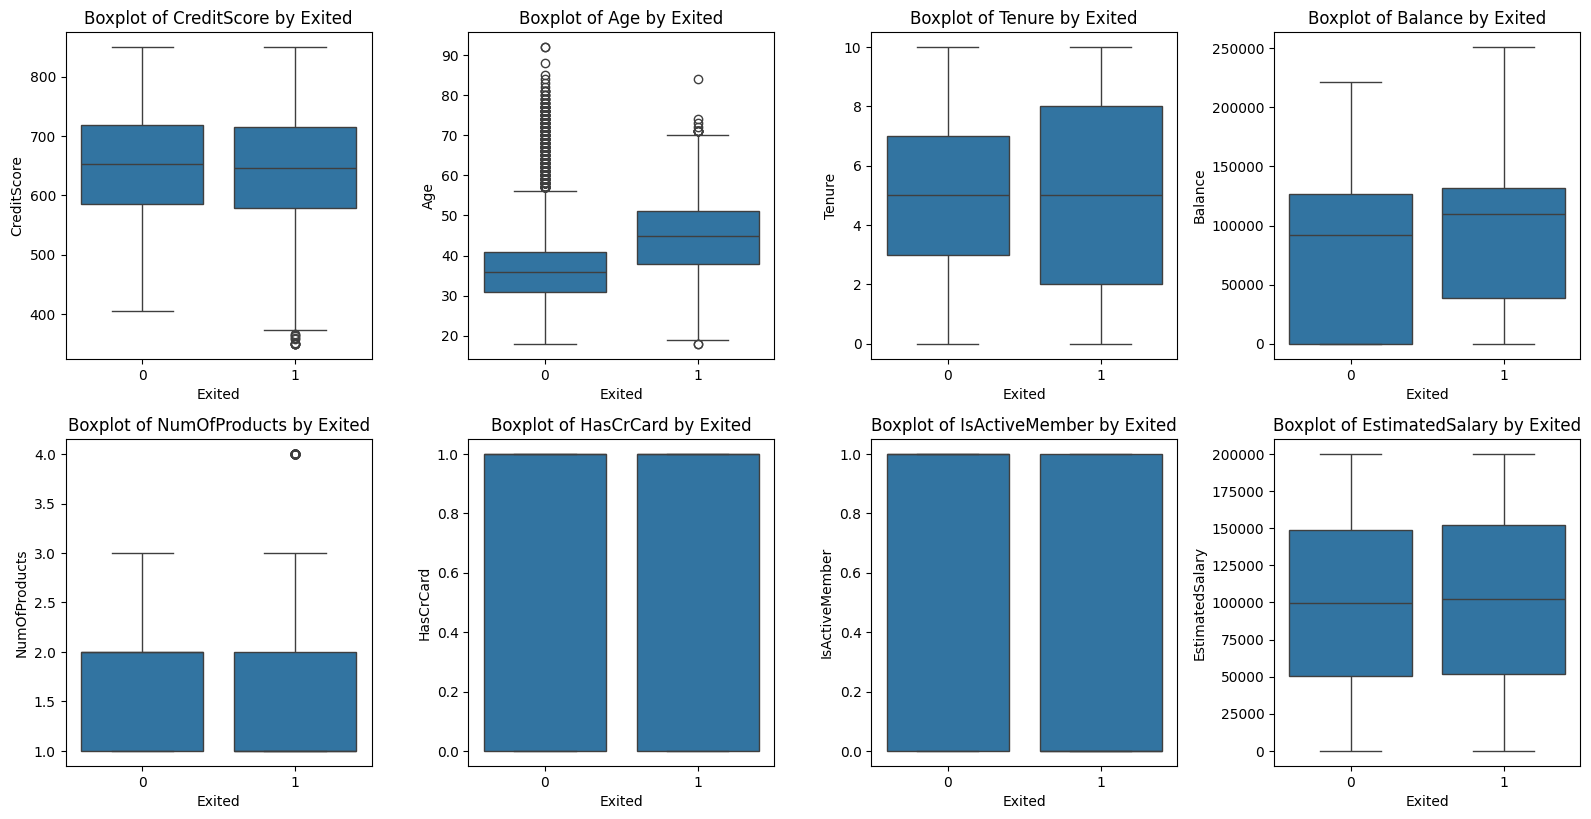

In [ ]:
# choose attribure for which boxplots will be created
numerical_columns = data.iloc[:, :-1].select_dtypes(include=['int64', 'float64']).drop(['Gender', 'Geography', 'Surname'], axis=1).columns


fig, axes = plot.subplots(4, 4, figsize=(16, 16))
axes = axes.flatten()

# plot boxplots for each attribute
for i, column in enumerate(numerical_columns[:16]):
    seaborn.boxplot(x='Exited', y=column, data=data, ax=axes[i])
    axes[i].set_title(f'Boxplot of {column} by Exited',fontsize=12)
    axes[i].set_xlabel('Exited')
    axes[i].set_ylabel(column)

for j in range(len(numerical_columns), 16):
    fig.delaxes(axes[j])

plot.tight_layout()
plot.show()

Multiple outliers can be identified in the Age and Credit Score category. However, after analysing these values they do not appear to be an error and simply reflects the wide range of attribute values in the dataset, as they are positioned close to the quartil.

There are two particular outliers that raise concerns and could pottently represent errors, since they are positioned significantly far away from the quartils, one for the NumOfProducts and one for the Age. These will be replaced by the arithmetic average for the attribute.



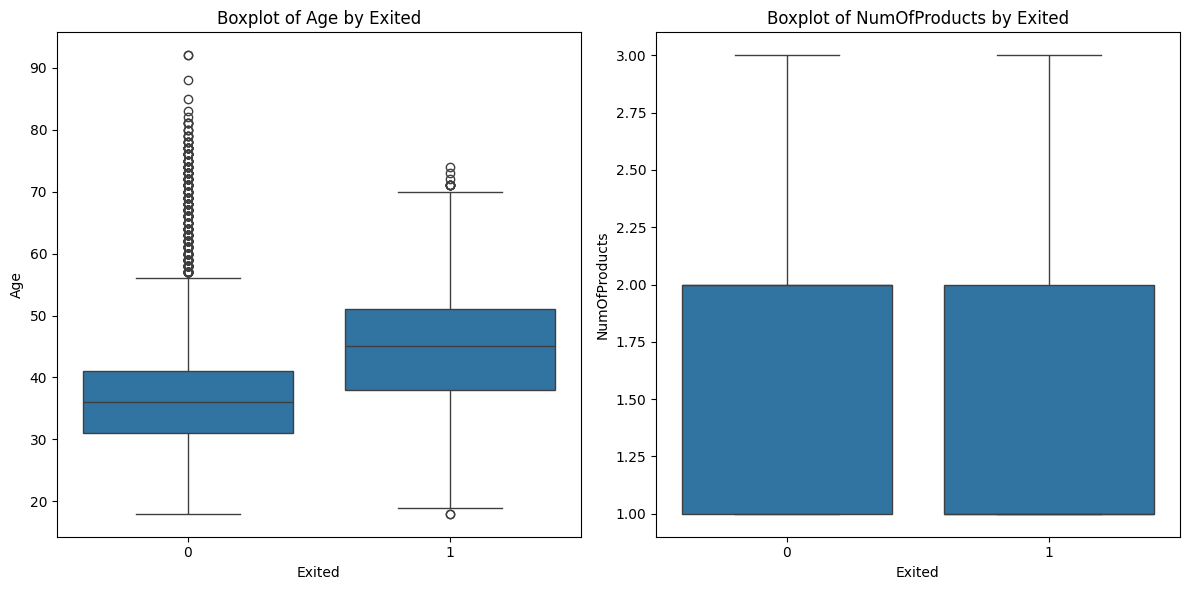

In [ ]:
# replace outlier in the column by the average
data_with_exited_1 = data[data['Exited'] == 1]
data.loc[data['Age'] == data_with_exited_1['Age'].max(), 'Age'] = int(data['Age'].mean())

# replace outlier in the column by the average
data.loc[data['NumOfProducts'] == data['NumOfProducts'].max(), 'NumOfProducts'] = int(data['NumOfProducts'].mean())

fig, axes = plot.subplots(1, 2, figsize=(12, 6))

for i, column in enumerate(['Age', 'NumOfProducts']):
    seaborn.boxplot(x='Exited', y=column, data=data, ax=axes[i])
    axes[i].set_title(f'Boxplot of {column} by Exited', fontsize=12)
    axes[i].set_xlabel('Exited')
    axes[i].set_ylabel(column)

plot.tight_layout()
plot.show()



Moreover, none of the attributes exhibit values that could potentially represent anomalies, such as negative age values. This indicates the data preprocessing phase was executed successfully.

The following inferences can be drawn from the graphs above:
- Individuals aged between 45 and 55 are more prone to churning.
- Individuals with lower balances (under 50,000) are less likely to churn.

## Data analysis

Finally, we can properly analyse the distribution of the data.

### Evaluating the balance

We started by evaluating the values in the target columns.


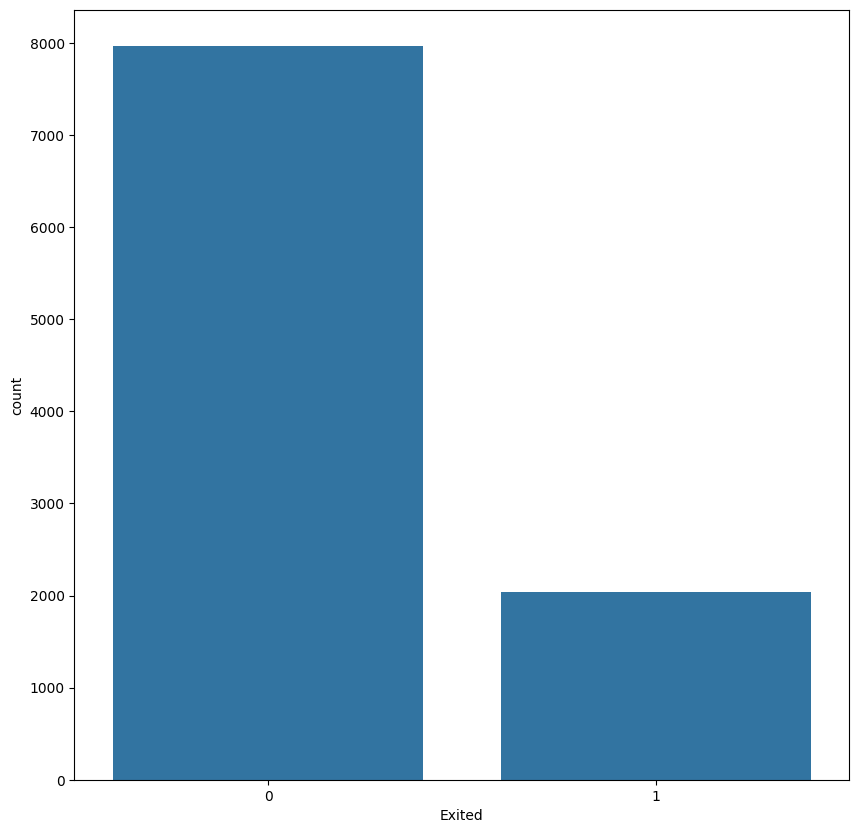

In [ ]:
# plot the graph
plot.figure(figsize=(10,10))
seaborn.countplot(x=data.Exited)
plot.show()

The graphs shows that the dataset is unbalanced. With this is mind, we will be experimenting to user both SMOTE and UnderSampling in the project.

### ScatterPlot

To explore the pairwise relationships and distributions of each column in the dataset, we used the pairplot() function. This method presents the distribution of each variable across combinations of two attributes, with 1 representing churning and 0 representing non-churning.

<Figure size 1000x1000 with 0 Axes>

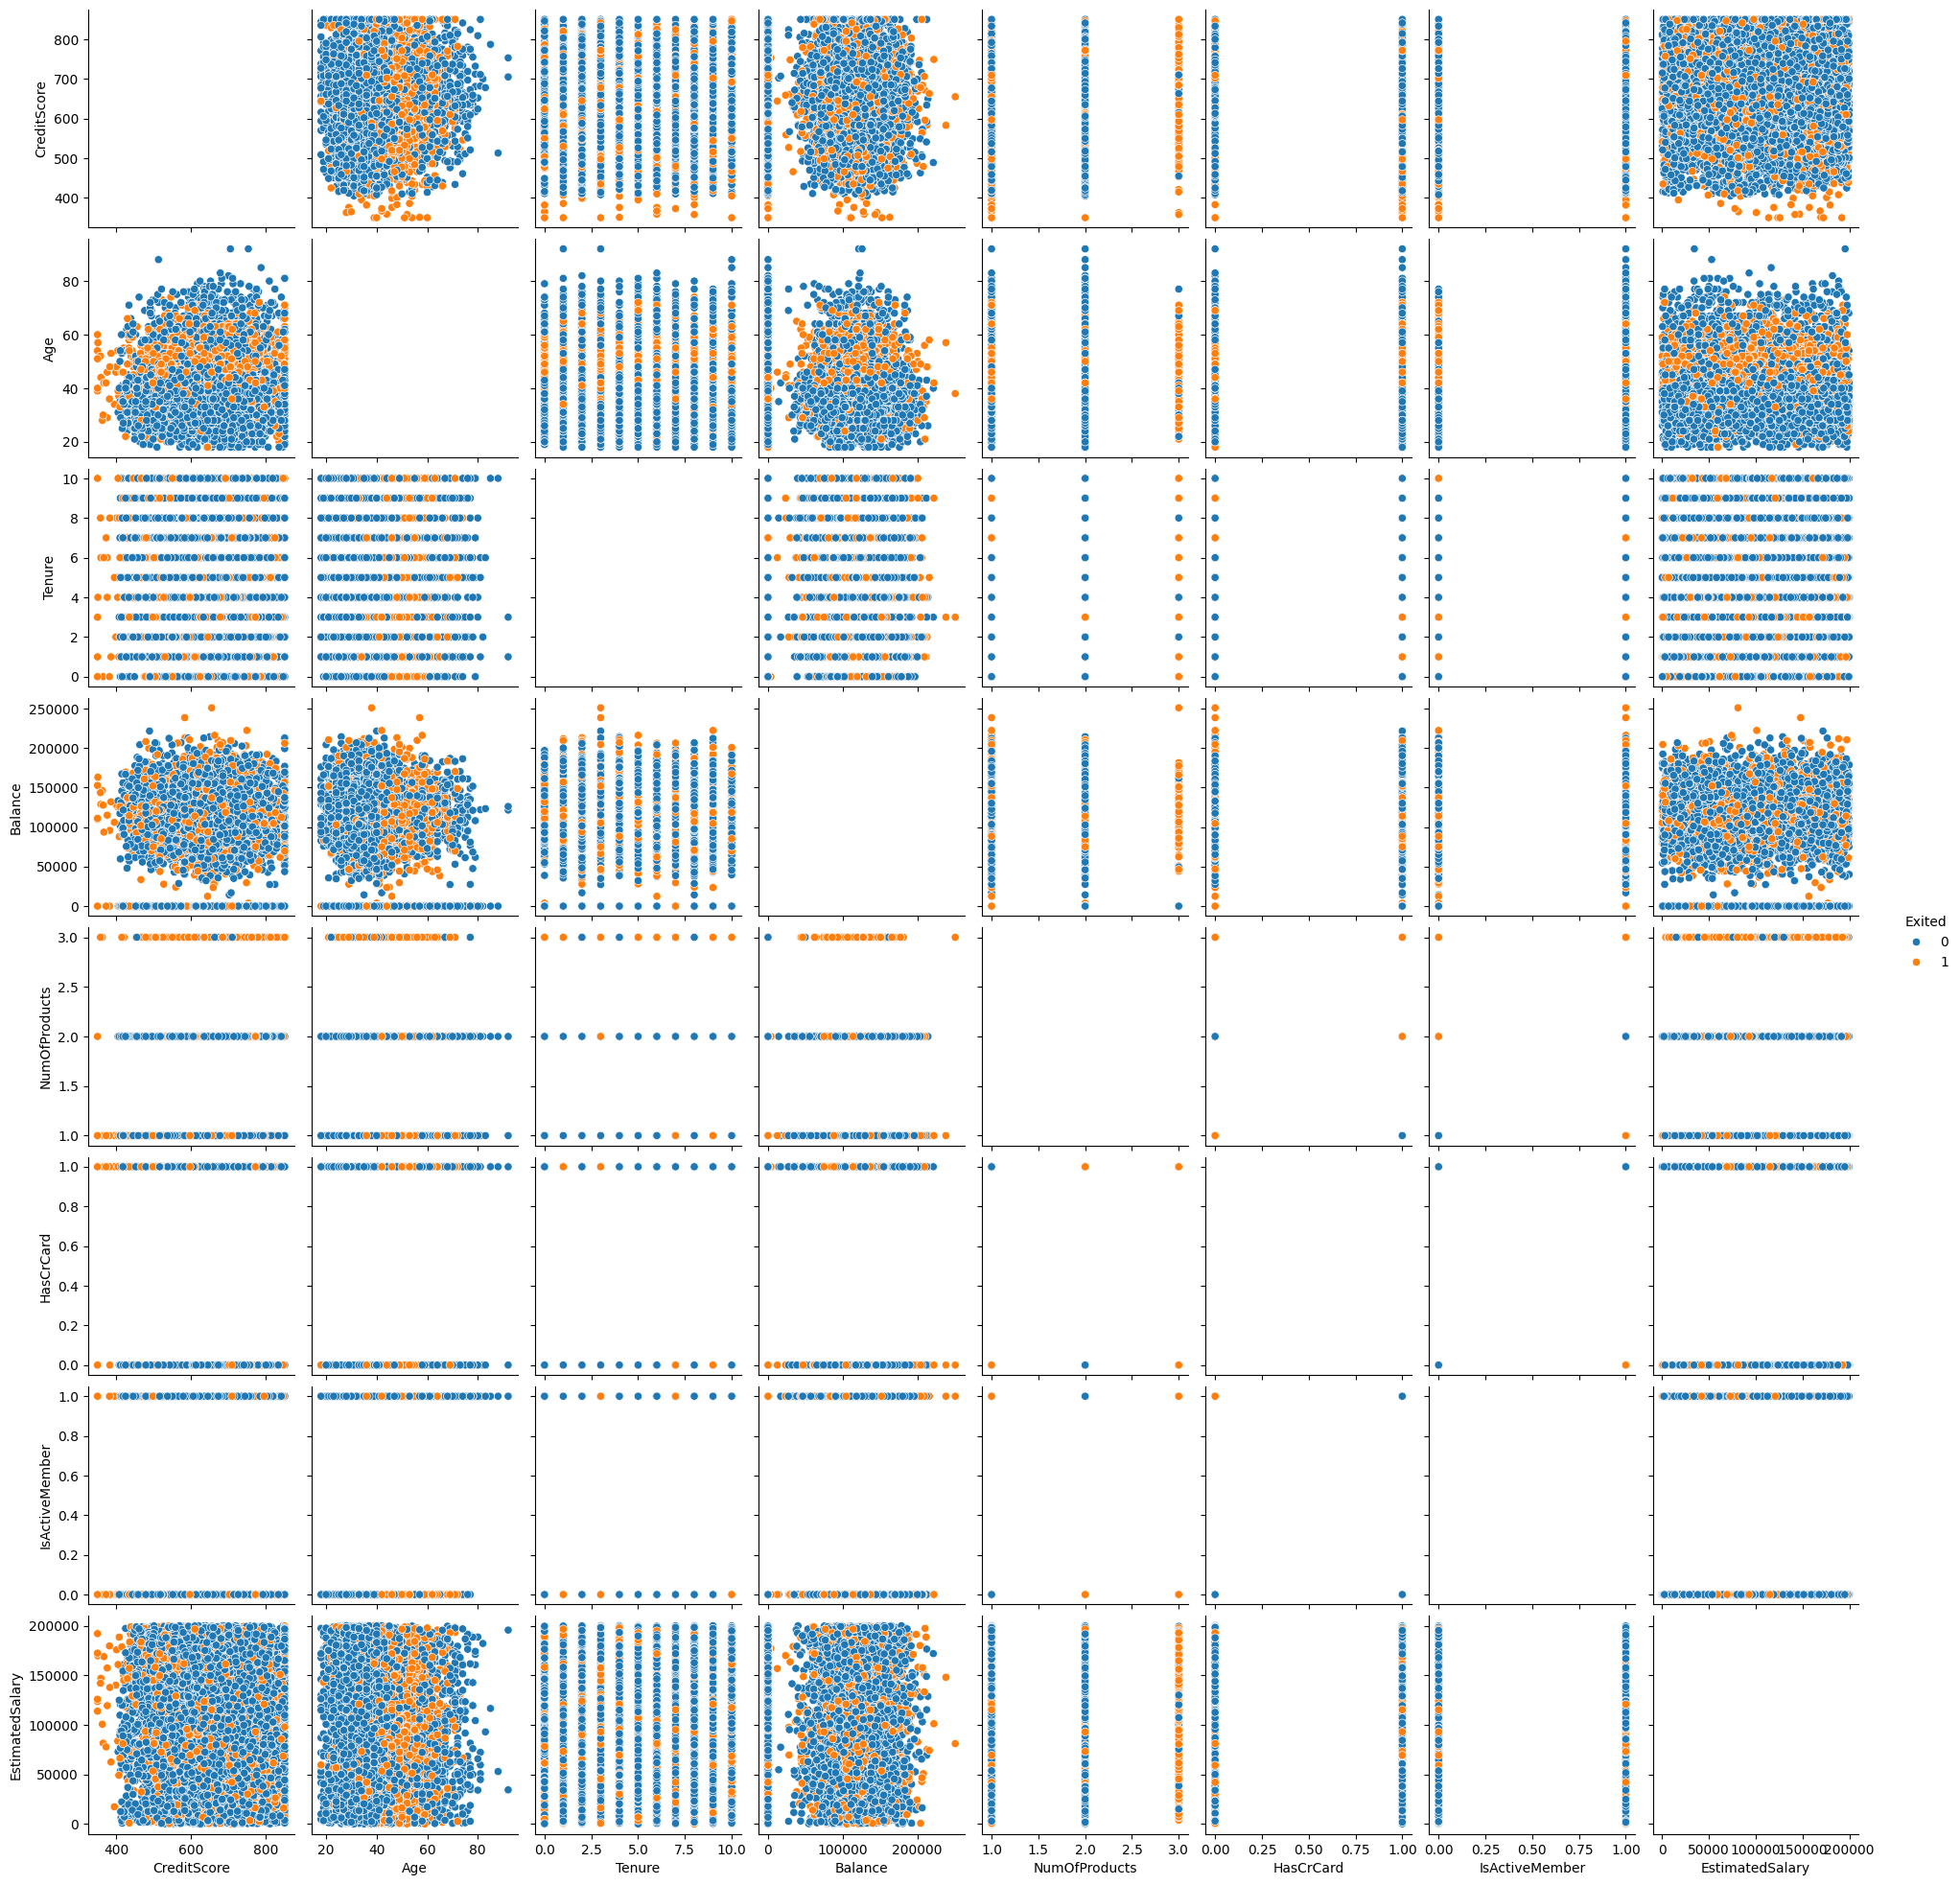

In [ ]:
# plot the scatter plot graph 
plot.figure(figsize=(10,10))
seaborn.pairplot(data.drop(['Gender', 'Geography', 'Surname'], axis=1), hue ='Exited', kind = 'scatter', diag_kind='reg')
plot.show()

It is evident that a significant portion of clients who have exited the bank fall within the age range of 40 to 60. Furthermore, customers with a higher number of products appear to be more likely to exit the bank. 

Beyond these observations, no other significant conclusions can be drawn.


### Correlation Matrix

To better understand the correlation between the multiple columns concerning the final outcome (exited or not) we generated a Correlation Matrix Alighter color indicates a direct correlation, while a darker color signifies an inverse correlation. 

It is crucial to remove the 'Gender' and 'Geography' and 'Surname' columns when generating the correlation matrix, as the analysis is intended for continuous columns. This ensures that only continuous variables are considered, excluding any columns encoded as ordinal variables or other non-continuous types.

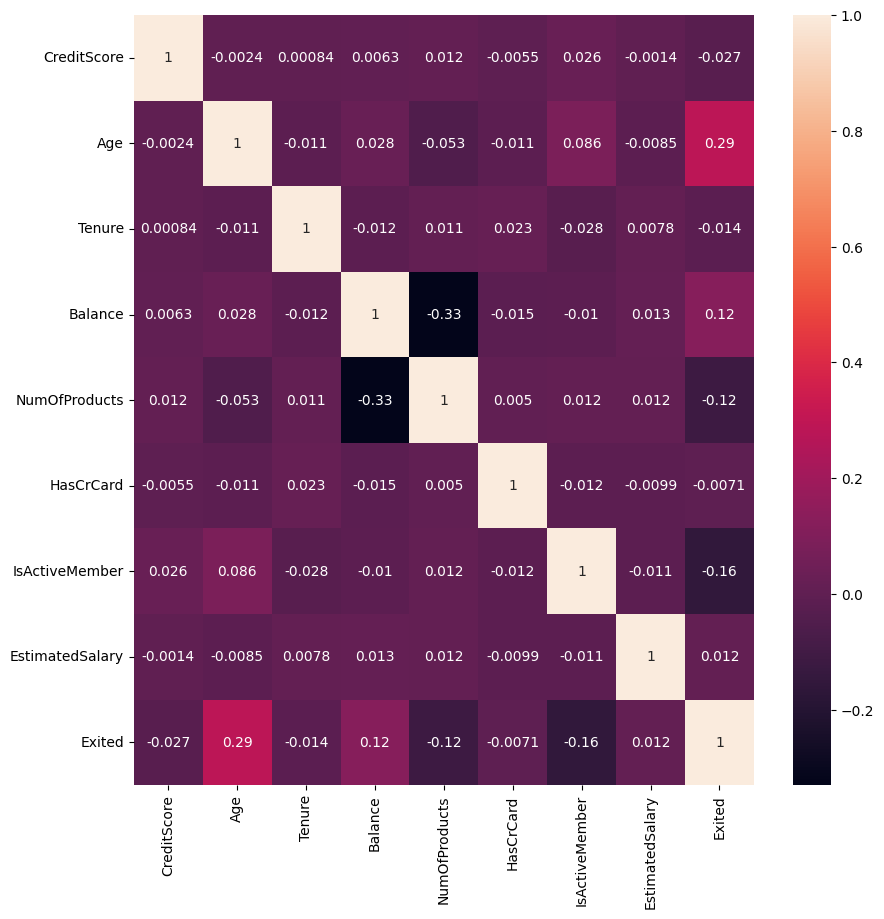

In [ ]:
# plot the correlation matrix
correlation_matrix = data.drop(['Gender', 'Geography', 'Surname'], axis=1).corr(numeric_only=True)
plot.figure(figsize=(10,10))
seaborn.heatmap(correlation_matrix, annot=True)
plot.show()


We can observe that no particular attributes exhibit a strong correlation with each other.

Only the "Age," as previously mentioned, appears to influence the "Exited" attribute. However, its correlation value is still not significant, standing at 0.29 out of a maximum of 1.

Some elements have a very negligable correlation value. For this reason, we might experiment to remove these to evaluate if it improves the model.

### Conclusions

Upon completing the initial phases of our project, we have determined:

- The dataset is devoid of errors, with the only significant change required being the encoding of categorical attributes.
- There is no strong correlation observed among the attributes.
- There exists a notable number of outliers for the Age attribute.

## Definition of Training and Testing Sets

Before the start of the classification phase we have to divide the given data into training and testing sets.

The dataset is quite large (10 000 entries), so the division into testing and training sets was done using a 30/70 ratio, to allow more data to be uses for testing and to have a consequent better performance of algorithms. The Class (output) is the "Exited" column whereas all the remaining ones are the Label (input).

As seen in the previous sections, the target attribute values are pretty imbalenced. 

To ensure this will not represent any problem to the Classification Algorithms, we will be exploring two sampling techniques:  <b>SMOTE </b> and <b>undersampling</b>.

SMOTE helps to address the imbalance in the dataset by increasing the number of samples in the minority class, making it more representative and improving the model's ability to learn from the minority class. Although there are no overlapping classes, the minority class is quite small, so we belive there is a change this technique will not be as effective as intendend. 

With this in mind, we will be experimenting to emply undersampling as well,a technique used to address class imbalance in datasets where one class significantly outnumbers the other. Undersampling addresses class imbalance by reducing the number of majority class samples to match the minority class, creating a balanced dataset but potentially losing important information.

Additionally, we will attempt to train and test the algorithms without the features that have a correlation with the target class below -0.01 (CreditScore, Tenure, HasCrCard), as they might mislead the classifiers and, according to the Correlation Matrix, do not significantly influence client churn.

In [ ]:
# identify the features and the classes
features = data.drop(['Exited'],axis=1)
classes = data['Exited']

# remove the columns with a correlation with the target of under -0.01
features_reduced = features.drop(['CreditScore', 'Tenure', 'HasCrCard'], axis=1)

# divide the data into training and testing input and output
training_input, testing_input, training_output, testing_output = train_test_split(features, classes, test_size=0.3, random_state = 0)
training_input_reduced, testing_input_reduced, training_output_reduced, testing_output_reduced = train_test_split(features_reduced, classes, test_size=0.3, random_state=0)

# training input and output with SMOTE
smote_resampled_training_input, smote_resampled_training_output = SMOTE(random_state=42).fit_resample(training_input, training_output)
smote_resampled_training_input_reduced, smote_resampled_training_output_reduced = SMOTE(random_state=42).fit_resample(training_input_reduced, training_output_reduced)


# training input and output with undersampling
undersampled_training_input, undersampled_training_output = RandomUnderSampler(random_state=42).fit_resample(training_input, training_output)
undersampled_training_input_reduced, undersampled_training_output_reduced = RandomUnderSampler(random_state=42).fit_resample(training_input_reduced, training_output_reduced)


## Classification Algorithms 

To classify each entrie of the table into one of the two classes (didn't churn or churned), we will be implementing and analysing the following supervised learning classification algorithms:

- Decision Tree Classifier
- K-Nearest Neighbour
- Support Vector Machine
- Naive Bayes
- Neural Networks

The usage of algorithms will consist of three wo phases: the learning phase, the testing phase and the evaluation pahse.

In the former one, the algorithm is trained given the traning input and output.  To understand which sampling technique works better with each classifier, we will be testing both <b>SMOTE</b> and <b>Undersampling</b> for each, as well as experimenting with and without the columns that don't have any correlation with the target value. For each classifier we will also use a <b>Grid Search</b> to optimize its parameters and ensure a better performance.

In the second phase, the algorithm is given the testing input to tests the performance of the model previously trained and compare it to the testing output.

Lastly we will be using multiple metrics to understand and evaluate the performance of the classifiers, such as: Accuracy, Precision, Recall and F1 Score. Additionally, we will also plot the Correlation Matrix and Roc Curve for the version of the classifier that works the best.

### Auxiliar Function to Help Evaluating Classifiers


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

def evaluate_classifier(predictions, testing_output):
    # calculate accuracy
    accuracy = accuracy_score(testing_output, predictions)
    accuracy_values.append(accuracy)
    print("Accuracy:", accuracy)

    # calculate precision
    precision = precision_score(testing_output, predictions)
    precision_values.append(precision)
    print("Precision:", precision)

    # calculate recall
    recall = recall_score(testing_output, predictions)
    recall_values.append(recall)
    print("Recall:", recall)

    # calculate F1-score
    f1 = f1_score(testing_output, predictions)
    f1_score_values.append(f1)
    print("F1 Score:", f1)

    # confusion Matrix
    conf_matrix = confusion_matrix(testing_output, predictions)

    # plot Confusion Matrix and ROC Curve side by side
    fig, axes = plot.subplots(1, 2, figsize=(15, 6))

    # plot Confusion Matrix
    seaborn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Not Exited', 'Exited'], 
                yticklabels=['Not Exited', 'Exited'], ax=axes[0])
    axes[0].set_xlabel('Predicted')
    axes[0].set_ylabel('True')
    axes[0].set_title('Confusion Matrix')

    # compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(testing_output, predictions)
    roc_auc = auc(fpr, tpr)

    # plot ROC curve
    axes[1].plot(fpr, tpr, lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    axes[1].plot([0, 1], [0, 1],  lw=2, linestyle='--')
    axes[1].set_xlim([0.0, 1.0])
    axes[1].set_ylim([0.0, 1.05])
    axes[1].set_xlabel('False Positive Rate')
    axes[1].set_ylabel('True Positive Rate')
    axes[1].set_title('Receiver Operating Characteristic (ROC) Curve')
    axes[1].legend(loc="lower right")

    plot.tight_layout()
    plot.show()



accuracy_values = []
precision_values = []
recall_values = []
f1_score_values = []

### Decision Tree Classifier

A decision tree classifier is a machine learning model that recursively partitions the feature space into regions, making decisions based on rules inferred from the data. It works by splitting the data into subsets based on the value of a feature that maximizes the information gain or minimizes impurity at each step. This process continues recursively, creating a tree-like structure where each internal node represents a decision based on a feature, each branch represents a possible value of that feature, and each leaf node represents the predicted outcome. 

#### Decision Tree Classifier with SMOTE

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=0)

# parameters for Grid Search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# grid search without sampling techniques
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
grid_search.fit(training_input, training_output)
print('Chosen parameters for Decision Tree with no sampling technqiue: ', grid_search.best_params_)

# train the classifier without sampling techniques
best_clf = grid_search.best_estimator_
grid_search.best_estimator_.fit(training_input, training_output)

# make predictions on the testing data without sampling techniques
best_predictions = best_clf.predict(testing_input)

# grid search for the original SMOTE resampled training set
grid_search_smote = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
grid_search_smote.fit(smote_resampled_training_input, smote_resampled_training_output)
print('Chosen parameters for Decision Tree with SMOTE: ', grid_search_smote.best_params_)

# train the classifier with the original SMOTE resampled
best_clf_smote = grid_search_smote.best_estimator_
grid_search_smote.best_estimator_.fit(smote_resampled_training_input, smote_resampled_training_output)

# make predictions on the testing data for the original SMOTE resampled
best_predictions_smote = best_clf_smote.predict(testing_input)


# grid search for the reduced SMOTE resampled training set
grid_search_smote_reduced = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
grid_search_smote_reduced.fit(smote_resampled_training_input_reduced, smote_resampled_training_output_reduced)
print('Chosen parameters for  Decision Tree with reduced SMOTE: ', grid_search_smote_reduced.best_params_)

# train the classifier with the reduced SMOTE resampled
best_clf_smote_reduced = grid_search_smote_reduced.best_estimator_
grid_search_smote_reduced.best_estimator_.fit(smote_resampled_training_input_reduced, smote_resampled_training_output_reduced)

# make predictions on the testing data for the reduced SMOTE resampled
best_predictions_smote_reduced = best_clf_smote_reduced.predict(testing_input_reduced)


Chosen parameters for Decision Tree with no sampling technqiue:  {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Chosen parameters for Decision Tree with SMOTE:  {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Chosen parameters for  Decision Tree with reduced SMOTE:  {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5}


Decisions Tree with no Sampling Technique:
Accuracy: 0.8286666666666667
Precision: 0.5024154589371981
Recall: 0.6034816247582205
F1 Score: 0.5483304042179262


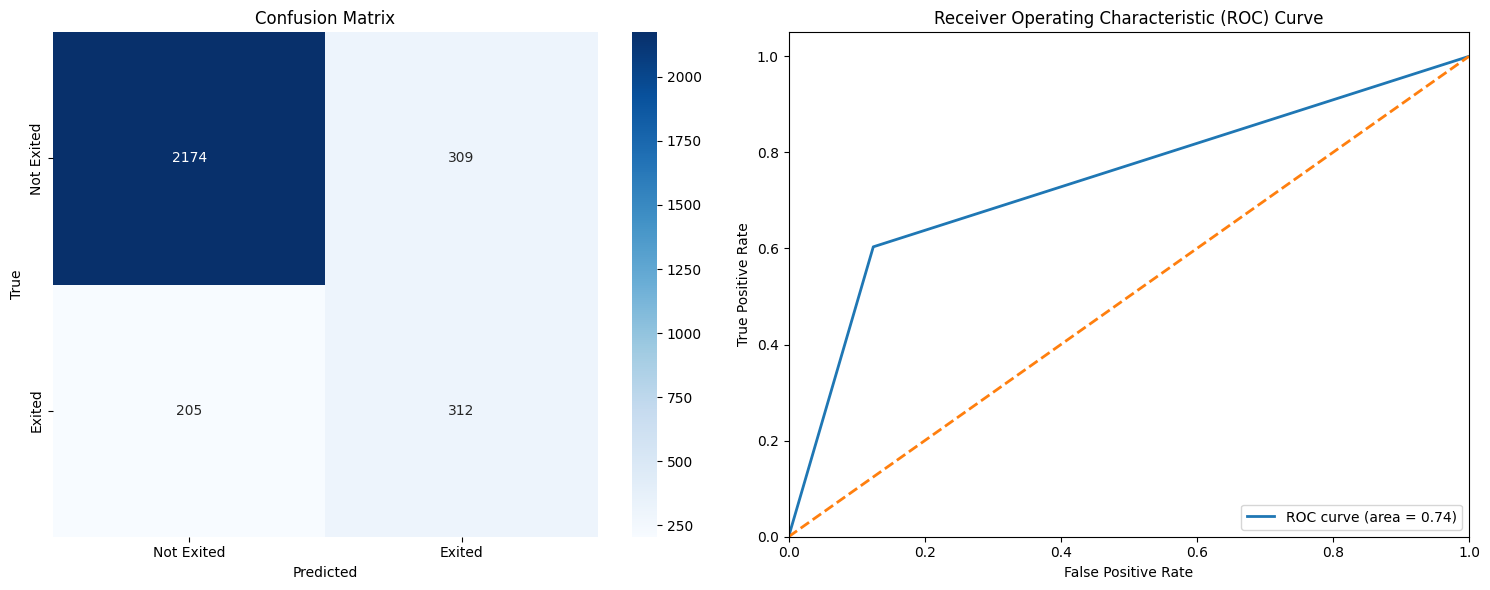

Decisions Tree with SMOTE:
Accuracy: 0.7443333333333333
Precision: 0.6843800322061192
Recall: 0.4267068273092369
F1 Score: 0.525664811379097


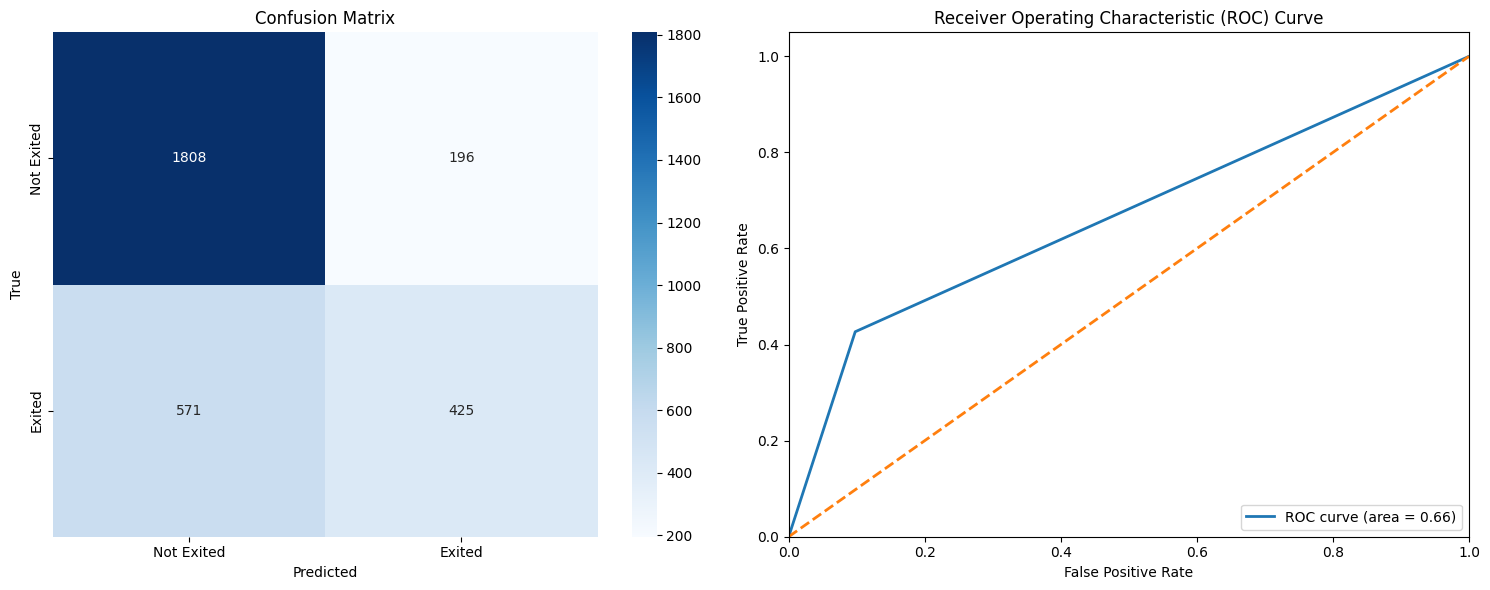

Decisions Tree with Reduced SMOTE:
Accuracy: 0.78
Precision: 0.6924315619967794
Recall: 0.4783092324805339
F1 Score: 0.5657894736842105


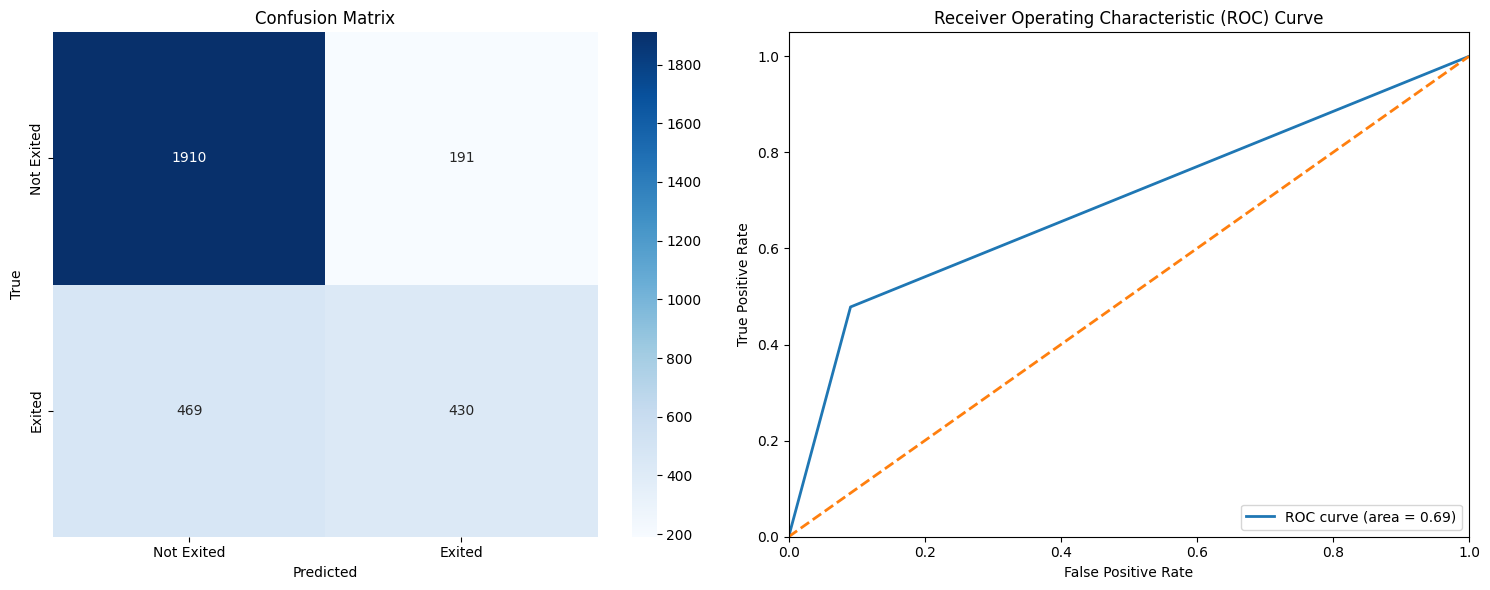

In [ ]:
# evaluating results without sampling techniques
print("Decisions Tree with no Sampling Technique:")
evaluate_classifier(testing_output, best_predictions)

# evaluating results for SMOTE
print("Decisions Tree with SMOTE:")
evaluate_classifier(testing_output, best_predictions_smote)

# evaluating results for reduced SMOTE
print("Decisions Tree with Reduced SMOTE:")
evaluate_classifier(testing_output_reduced, best_predictions_smote_reduced)

#### Decision Three with Undersampling

In [ ]:
# grid search for the original undersampled training set
grid_search_undersample = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
grid_search_undersample.fit(undersampled_training_input, undersampled_training_output)
print('Chosen parameters for  Decision Tree with  undersampling: ', grid_search_undersample.best_params_)

# train the classifier with the original undersampled training sets
best_clf_undersample = grid_search_undersample.best_estimator_
grid_search_undersample.best_estimator_.fit(undersampled_training_input, undersampled_training_output)

# make predictions on the testing data for the original undersampled sets
best_predictions_undersample = best_clf_undersample.predict(testing_input)

# grid search for the reduced undersampled training set
grid_search_undersample_reduced = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
grid_search_undersample_reduced.fit(undersampled_training_input_reduced, undersampled_training_output_reduced)
print('Chosen parameters for  Decision Tree with reduced undersampling: ', grid_search_undersample_reduced.best_params_)

# train the classifier with the reduced undersample sets
best_clf_undersample_reduced = grid_search_undersample_reduced.best_estimator_
grid_search_undersample_reduced.best_estimator_.fit(undersampled_training_input_reduced, undersampled_training_output_reduced)

# make predictions on the testing data for the reduced undersample sets
best_predictions_undersample_reduced = best_clf_undersample_reduced.predict(testing_input_reduced)

Chosen parameters for  Decision Tree with  undersampling:  {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10}
Chosen parameters for  Decision Tree with reduced undersampling:  {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5}


Decisions Tree with Undersample:
Accuracy: 0.721
Precision: 0.7568438003220612
Recall: 0.40657439446366783
F1 Score: 0.5289814293753518


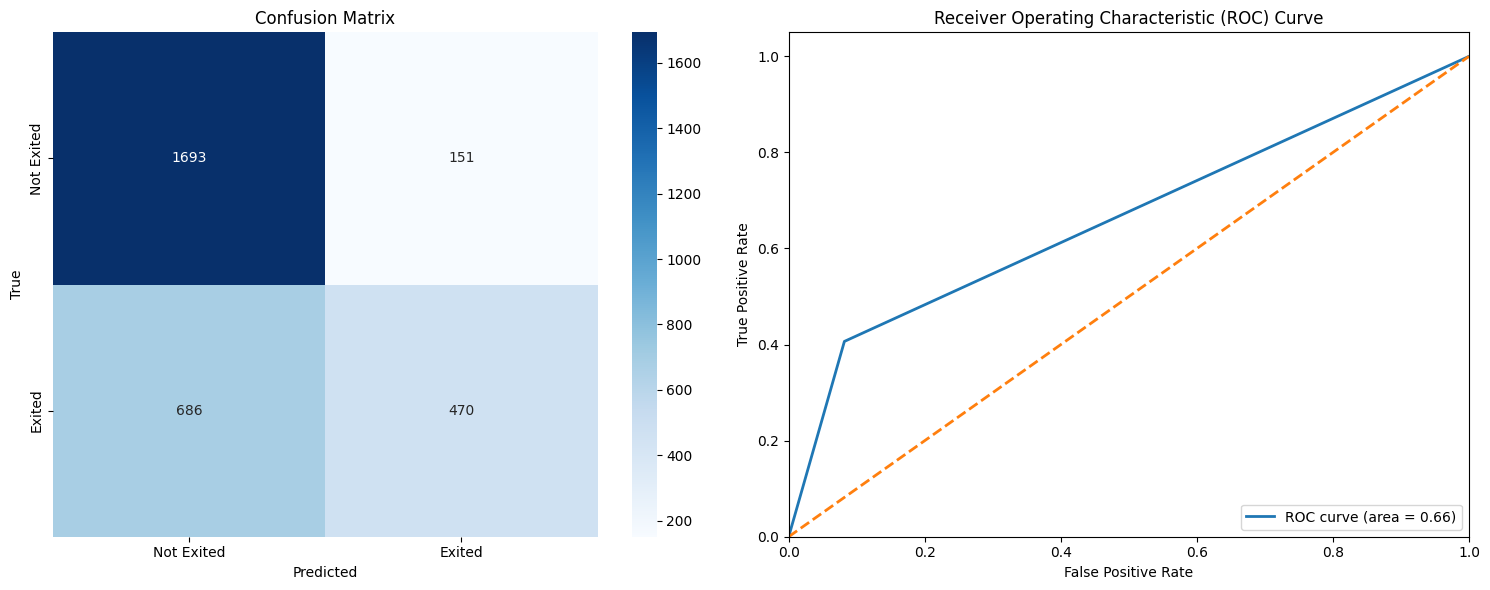

Decisions Tree  with Reduced Undersampling:
Accuracy: 0.7436666666666667
Precision: 0.7326892109500805
Recall: 0.43005671077504726
F1 Score: 0.5419892793329363


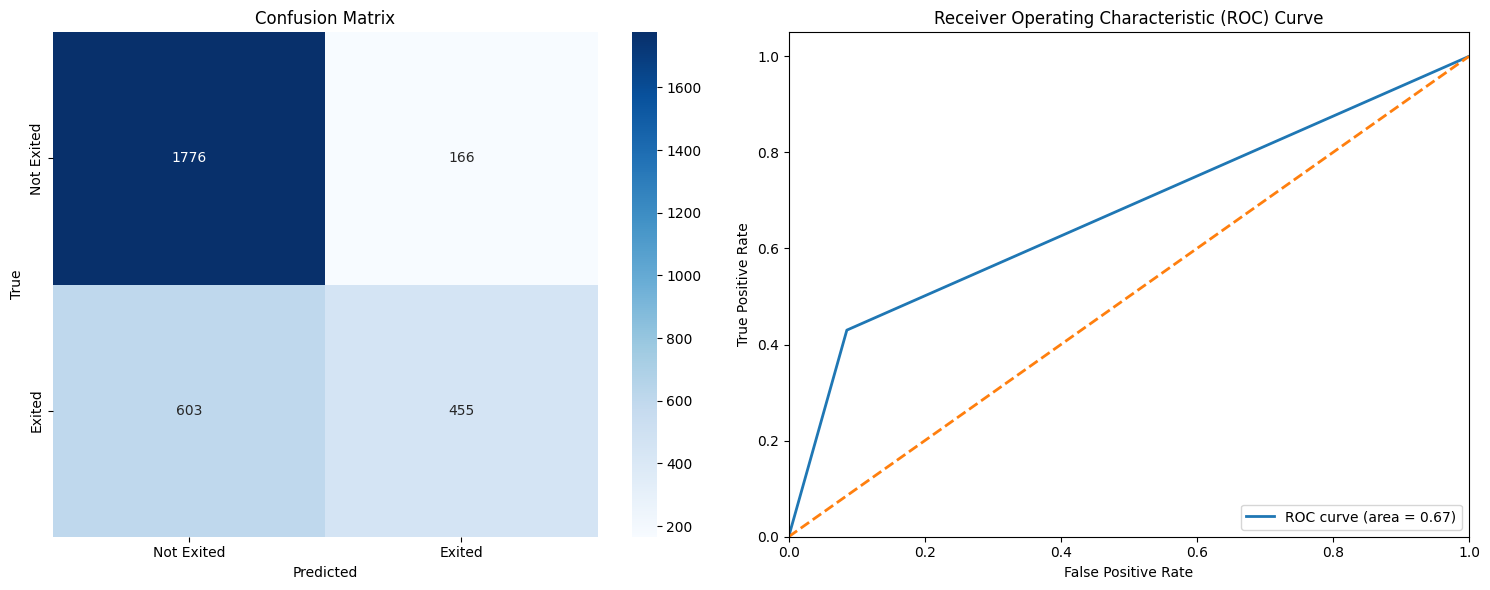

In [ ]:
# evaluating results for Undersampling
print("Decisions Tree with Undersample:")
evaluate_classifier(testing_output, best_predictions_undersample)

# evaluating results for reduced Undersampling
print("Decisions Tree  with Reduced Undersampling:")
evaluate_classifier(testing_output_reduced, best_predictions_undersample_reduced)

## K-Nearest Neighbour

The K-nearest neighbours, is a supervised learning algorithm that consists mainly in the assumption that similar data points are likely to belong to the same class. The "k" in k-NN refers to the number of nearest neighbors to consider when making predictions. Based on this number, the algorithm tries to predict the output value of a data point considering their proximidity to the k nearest neighbour.

In [ ]:
from sklearn import neighbors
from sklearn.metrics import auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

k_nn = neighbors.KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40, 50],
    'p': [1, 2]
}

# grid search without sampling techniques
grid_search_knn = GridSearchCV(estimator=k_nn, param_grid=param_grid, cv=5)
grid_search_knn.fit(training_input, training_output)
print('Chosen parameters for KNN with no sampling technique: ', grid_search_knn.best_params_)

# train the classifier without sampling techniques
best_clf_knn = grid_search_knn.best_estimator_
grid_search_knn.best_estimator_.fit(training_input, training_output)

# make predictions on the testing data without sampling techniques
best_predictions_knn = best_clf_knn.predict(testing_input)

# grid search for the original SMOTE resampled training set
grid_search_smote = GridSearchCV(estimator=k_nn, param_grid=param_grid, cv=5)
grid_search_smote.fit(smote_resampled_training_input, smote_resampled_training_output)

print('Chosen parameters for KNN with SMOTE: ', grid_search_smote.best_params_)

# train the classifier with the original SMOTE resampled
best_clf_smote = grid_search_smote.best_estimator_
grid_search_smote.best_estimator_.fit(smote_resampled_training_input, smote_resampled_training_output)

# make predictions on the testing data for the original SMOTE resampled
best_predictions_smote_knn = best_clf_smote.predict(testing_input)


# grid search for the reduced SMOTE resampled training set
grid_search_smote_reduced = GridSearchCV(estimator=k_nn, param_grid=param_grid, cv=5)
grid_search_smote_reduced.fit(smote_resampled_training_input_reduced, smote_resampled_training_output_reduced)
print('Chosen parameters for KNN with reduced SMOTE: ', grid_search_smote_reduced.best_params_)

# train the classifier with the reduced SMOTE resampled
best_clf_smote_reduced = grid_search_smote_reduced.best_estimator_
best_clf_smote_reduced.fit(smote_resampled_training_input_reduced, smote_resampled_training_output_reduced)

# make predictions on the testing data for the reduced SMOTE resampled
best_predictions_smote_reduced_knn = best_clf_smote_reduced.predict(testing_input_reduced)

Chosen parameters for KNN with no sampling technique:  {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}
Chosen parameters for KNN with SMOTE:  {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Chosen parameters for KNN with reduced SMOTE:  {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}


KNN without Sampling Techniques:
Accuracy: 0.7683333333333333
Precision: 0.061191626409017714
Recall: 0.25333333333333335
F1 Score: 0.09857328145265888


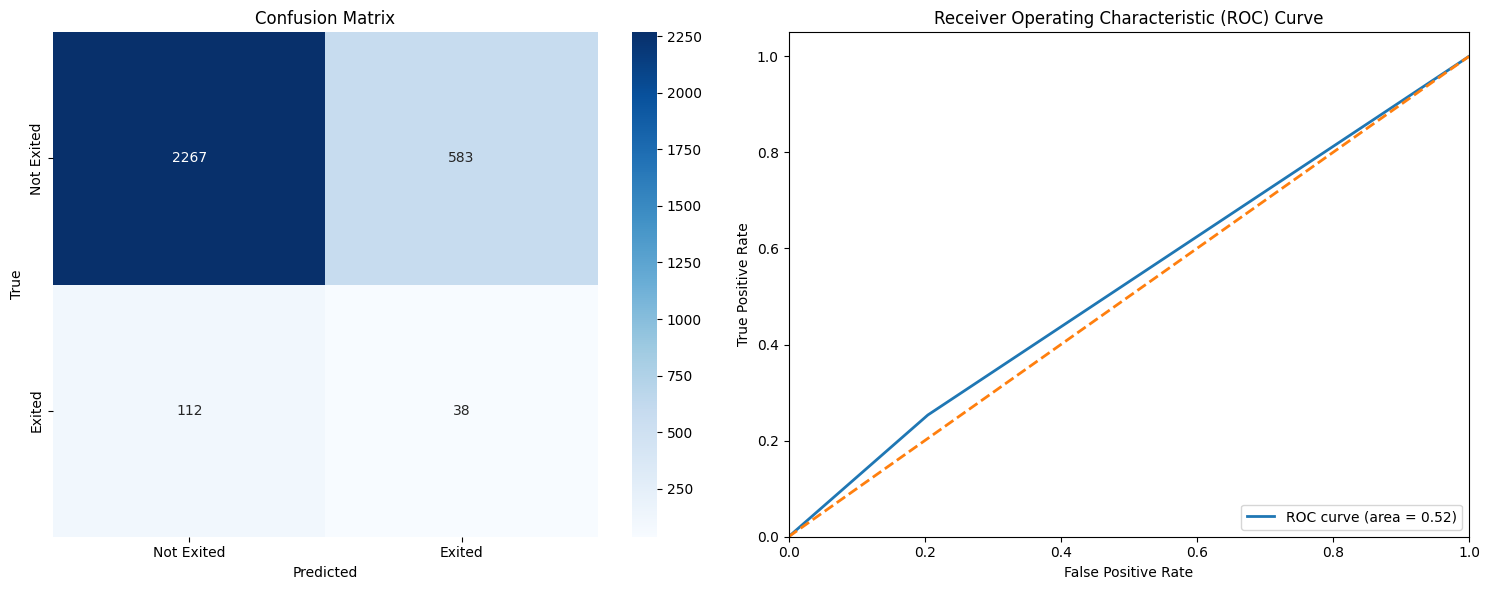

KNN with SMOTE:
Accuracy: 0.5866666666666667
Precision: 0.3687600644122383
Recall: 0.21262766945218198
F1 Score: 0.2697290930506478


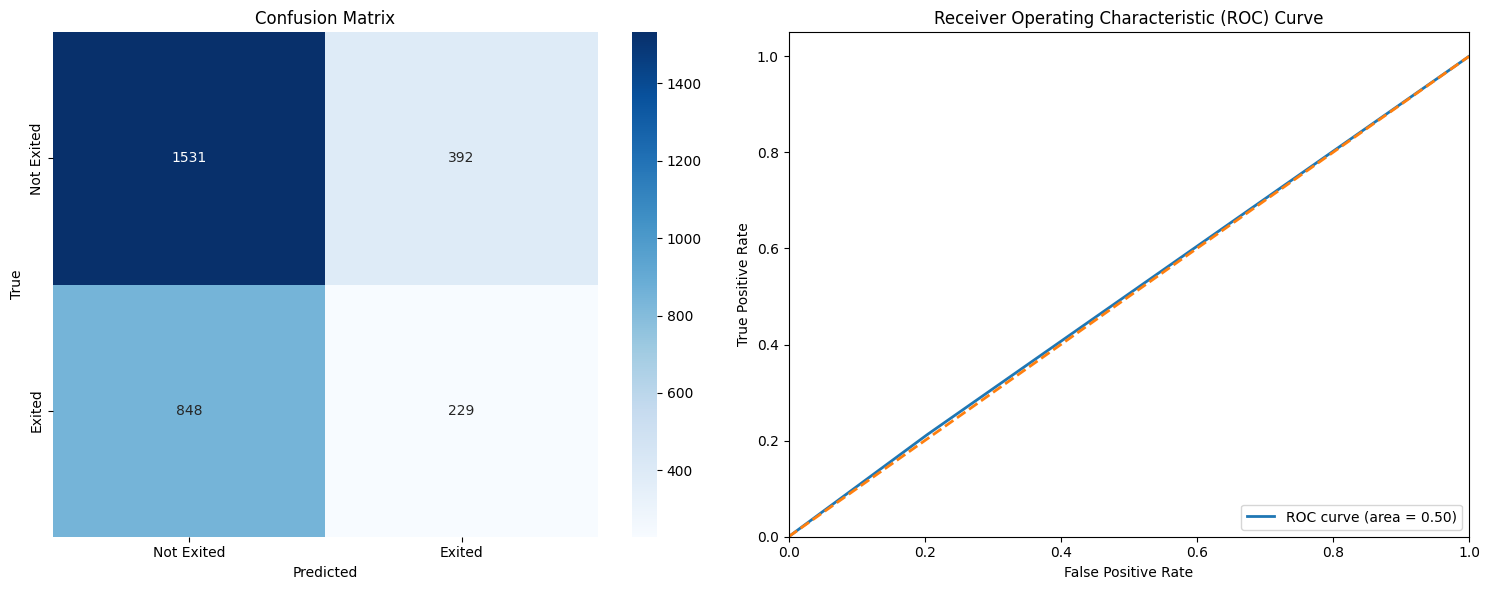

KNN with Reduced SMOTE:
Accuracy: 0.5903333333333334
Precision: 0.3752012882447665
Recall: 0.2169459962756052
F1 Score: 0.27492625368731566


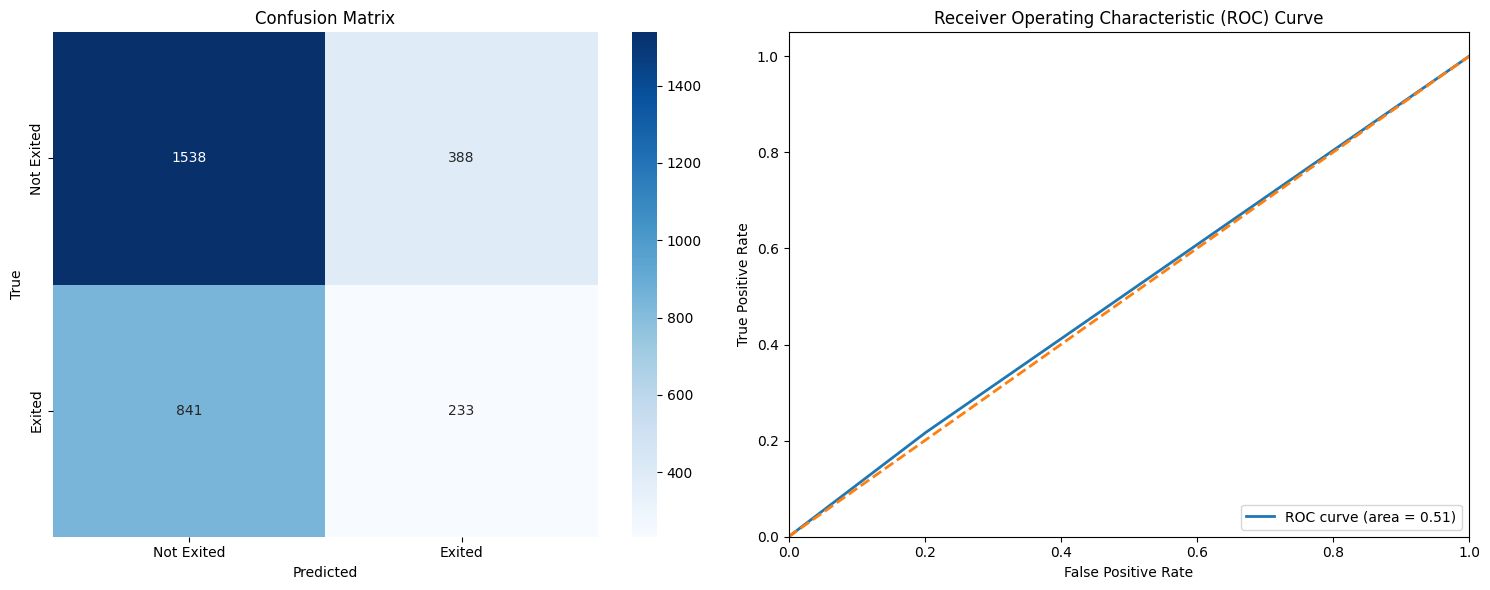

In [ ]:
# evaluating results for SMOTE with no Sampling Techniques
print("KNN without Sampling Techniques:")
evaluate_classifier(testing_output, best_predictions_knn)

# evaluating results for SMOTE
print("KNN with SMOTE:")
evaluate_classifier(testing_output, best_predictions_smote_knn)

# evaluating results for reduced SMOTE
print("KNN with Reduced SMOTE:")
evaluate_classifier(testing_output_reduced, best_predictions_smote_reduced_knn)

### KNN with UnderSampling

In [ ]:
# grid search for the original Undersampling  training set
grid_search_undersample_knn = GridSearchCV(estimator=k_nn, param_grid=param_grid, cv=5)
grid_search_undersample_knn.fit(undersampled_training_input, undersampled_training_output)

print('Chosen parameters for KNN with Undersampling: ', grid_search_undersample_knn.best_params_)

# train the classifier with the original Undersampling 
best_clf_undersample_knn = grid_search_undersample_knn.best_estimator_
grid_search_undersample_knn.best_estimator_.fit(undersampled_training_input, undersampled_training_output)

# make predictions on the testing data for the original SMOTE resampled
best_preditions_undersample_knn = best_clf_undersample_knn.predict(testing_input)


# grid search for the reduced Undersampling training set
grid_search_undersample_reduced_knn = GridSearchCV(estimator=k_nn, param_grid=param_grid, cv=5)
grid_search_undersample_reduced_knn.fit(undersampled_training_input_reduced, undersampled_training_output_reduced)
print('Chosen parameters for KNN with reduced Undersampling: ', grid_search_undersample_reduced_knn.best_params_)

# train the classifier with the reduced Undersampling sets
best_clf_undersample_reduced_knn = grid_search_undersample_reduced_knn.best_estimator_
best_clf_undersample_reduced_knn.fit(undersampled_training_input_reduced, undersampled_training_output_reduced)

# make predictions on the testing data for the reduced Undersampling sets
best_predictions_undersample_reduced_knn = best_clf_undersample_reduced_knn.predict(testing_input_reduced)

Chosen parameters for KNN with Undersampling:  {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 7, 'p': 2, 'weights': 'distance'}


KNN with Undersampling:
Accuracy: 0.5176666666666667
Precision: 0.5072463768115942
Recall: 0.21634615384615385
F1 Score: 0.3033220991815118


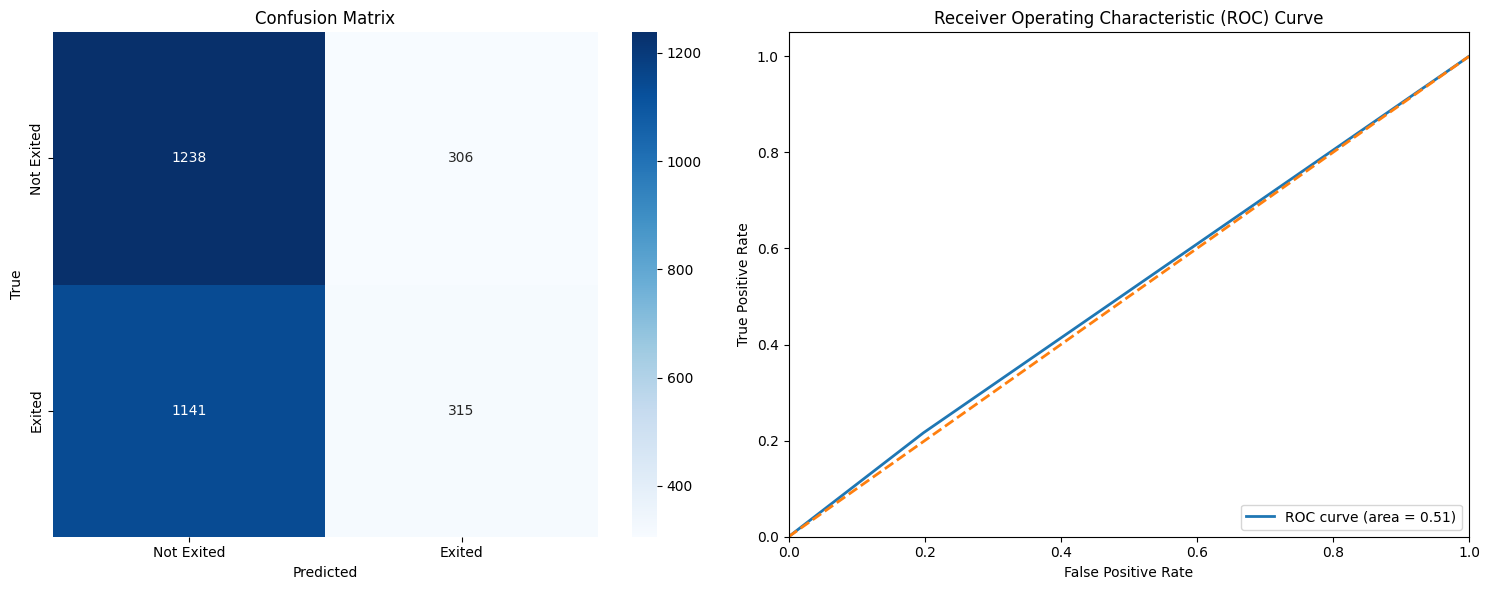

KNN with reduced Undersampling:
Accuracy: 0.5163333333333333
Precision: 0.5104669887278583
Recall: 0.21653005464480873
F1 Score: 0.3040767386091127


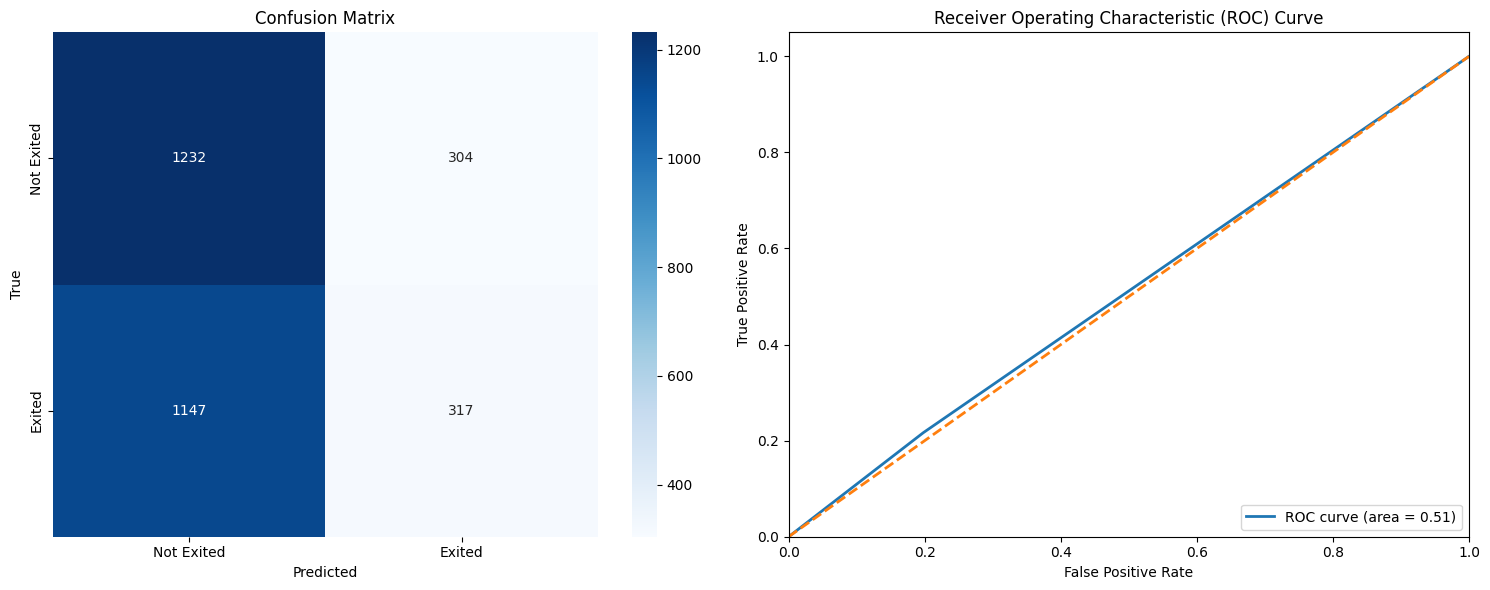

In [ ]:
# evaluating results for Undersamplinh
print("KNN with Undersampling:")
evaluate_classifier(testing_output, best_preditions_undersample_knn)

# evaluating results for reduced SMOTE
print("KNN with reduced Undersampling:")
evaluate_classifier(testing_output_reduced, best_predictions_undersample_reduced_knn)

### Support Vector Machines (SVM)


Support Vector Machines (SVM) is a supervised learning algorithm  widely used for classification and regression tasks. It is known for its versatility in handling both linear and non-linear data. SVMs are popular due to their ability to find optimal hyperplanes that maximize the margin between different classes, resulting in robust and accurate predictions.

#### Support Vector Machines with SMOTE

In [ ]:
from sklearn.svm import SVC


svm_clf = SVC(random_state=0)

parameter_grid = {
    'C': [0.1, 1],  
    'gamma': [1, 0.1],
}


grid_search_svm = GridSearchCV(estimator=svm_clf, param_grid=parameter_grid, cv=5)
grid_search_svm.fit(training_input, training_output)

print('Chosen parameters for SVM:', grid_search_svm.best_params_)

Chosen parameters for SVM: {'C': 0.1, 'gamma': 1}


As parameterizing SVC with the kernel parameter took too long to run (around 50 minutes) we decided to use the improved Linear SVC, also for sklearn for training and testing instead. This allowed to test some new parameters.

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV


linear_svm_clf = LinearSVC(random_state=0, max_iter=1000)


param_grid = {
    'C': [0.1, 1, 10],  
    'penalty':['l1', 'l2'],
    'dual' : [False]
}

# grid search for SVC without sampling tecnhiques
grid_search_svc = GridSearchCV(estimator=linear_svm_clf, param_grid=param_grid, cv=5)
grid_search_svc.fit(training_input, training_output)

print('Chosen parameters for Linear SVC with SMOTE: ', grid_search_svc.best_params_)

# train SVC without sampling tecnhiques
best_clf_smote_svc = grid_search_svc.best_estimator_
grid_search_svc.best_estimator_.fit(training_input, training_output)

# make predictions on the testing data ffor SVC without sampling tecnhiques
best_predictions_svc = grid_search_svc.predict(testing_input)


# grid search for the SVC with SMOTE 
grid_search_smote_svc = GridSearchCV(estimator=linear_svm_clf, param_grid=param_grid, cv=5)
grid_search_smote_svc.fit(smote_resampled_training_input, smote_resampled_training_output)

print('Chosen parameters for Linear SVC without sampling techniques: ', grid_search_smote_svc.best_params_)

# train SVC with SMOTE 
best_clf_smote_svc = grid_search_smote_svc.best_estimator_
grid_search_smote_svc.best_estimator_.fit(smote_resampled_training_input, smote_resampled_training_output)

# make predictions on SVC with SMOTE 
best_predictions_smote_svc = best_clf_smote_svc.predict(testing_input)


# grid search for the SVC with reduced SMOTE 
grid_search_smote_reduced_svc = GridSearchCV(estimator=linear_svm_clf, param_grid=param_grid, cv=5)
grid_search_smote_reduced_svc.fit(smote_resampled_training_input_reduced, smote_resampled_training_output_reduced)
print('Chosen parameters for Linear SVC with reduced SMOTE: ', grid_search_smote_reduced_svc.best_params_)

# train SVC with reduced SMOTE 
best_clf_smote_reduced_svc = grid_search_smote_reduced_svc.best_estimator_
best_clf_smote_reduced_svc.fit(smote_resampled_training_input_reduced, smote_resampled_training_output_reduced)

# make predictions on the testing data for the reduced SMOTE resampled
best_predictions_smote_reduced_svc = best_clf_smote_reduced_svc.predict(testing_input_reduced)


Chosen parameters for Linear SVC with SMOTE:  {'C': 1, 'dual': False, 'penalty': 'l1'}
Chosen parameters for Linear SVC without sampling techniques:  {'C': 10, 'dual': False, 'penalty': 'l1'}
Chosen parameters for Linear SVC with reduced SMOTE:  {'C': 1, 'dual': False, 'penalty': 'l1'}


SVC with no Sampling Technique
Accuracy: 0.7983333333333333
Precision: 0.1143317230273752
Recall: 0.5634920634920635
F1 Score: 0.19009370816599733


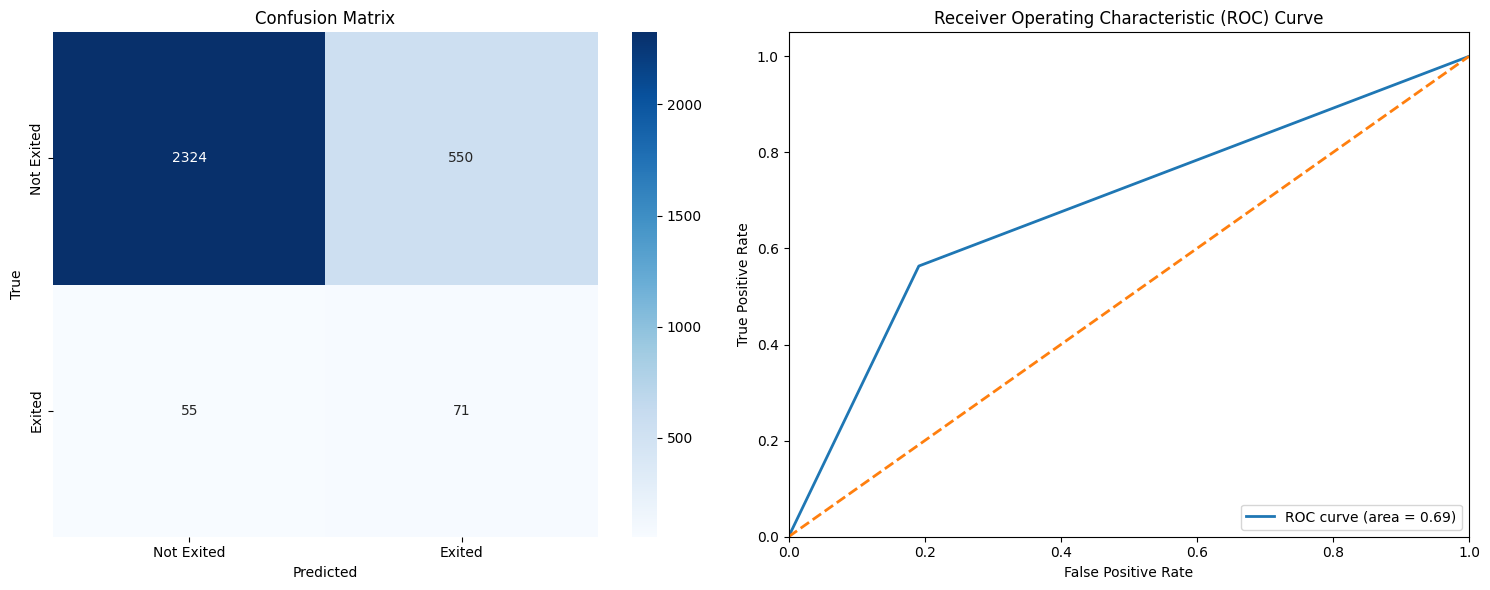

SVC with SMOTE:
Accuracy: 0.7286666666666667
Precision: 0.6151368760064412
Recall: 0.3991640543364681
F1 Score: 0.4841571609632446


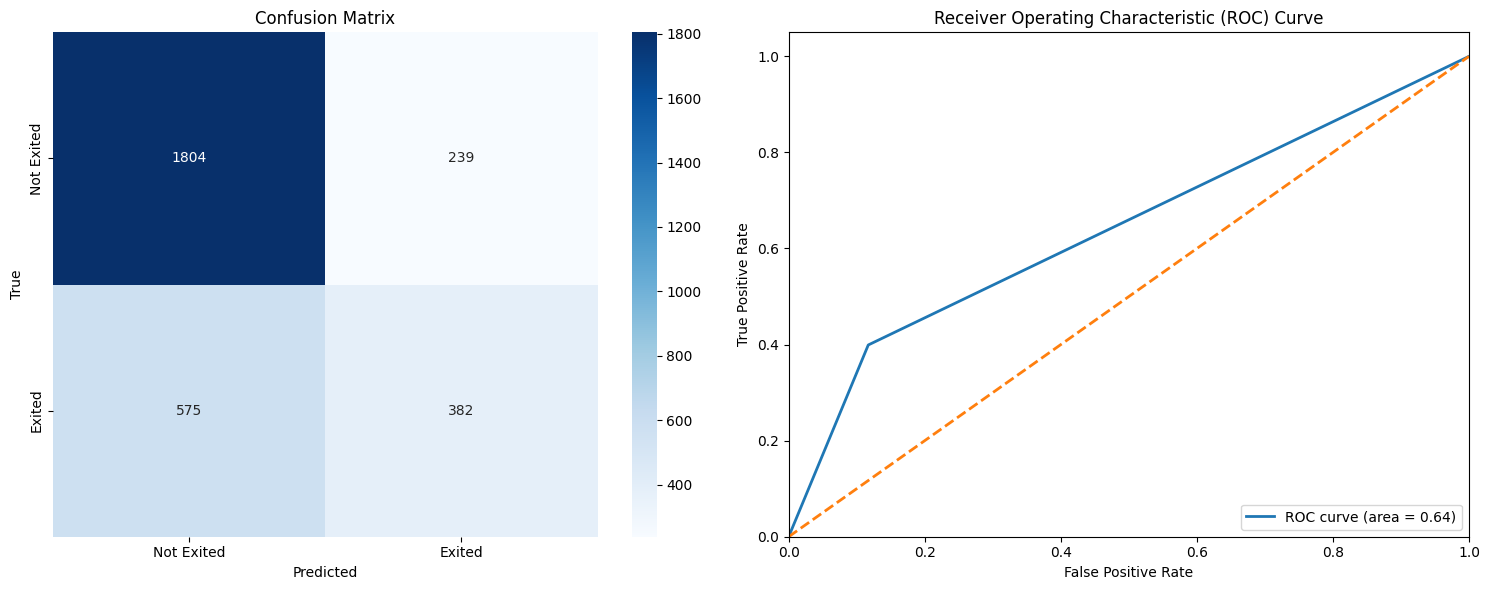

SVC with reduced SMOTE:
Accuracy: 0.7326666666666667
Precision: 0.6344605475040258
Recall: 0.4066047471620227
F1 Score: 0.49559748427672956


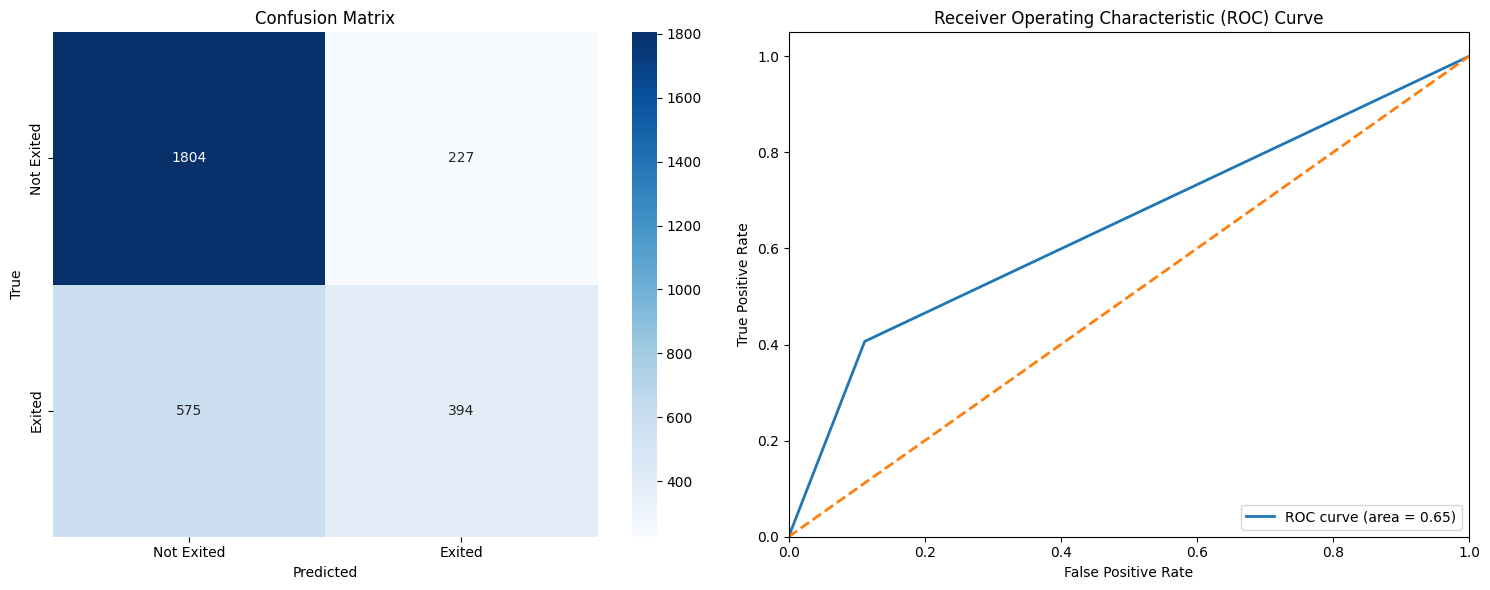

In [ ]:
# evaluating results for SVC
print("SVC with no Sampling Technique")
evaluate_classifier(testing_output, best_predictions_svc)

# evaluating results for SVC with SMOTE
print("SVC with SMOTE:")
evaluate_classifier(testing_output, best_predictions_smote_svc)

# evaluating results for SVC with reduced SMOTE
print("SVC with reduced SMOTE:")
evaluate_classifier(testing_output_reduced, best_predictions_smote_reduced_svc)

#### Support Vector Machines with UnderSampling

In [ ]:
# grid search for SVC with undersampling 
grid_search_undersample_svc = GridSearchCV(estimator=linear_svm_clf, param_grid=param_grid, cv=5)
grid_search_undersample_svc.fit(undersampled_training_input, undersampled_training_output)

print('Chosen parameters for SVC with Undersampling: ', grid_search_undersample_svc.best_params_)

# train SVC with undersampling 
best_clf_undersample_svc = grid_search_undersample_svc.best_estimator_
grid_search_undersample_svc.best_estimator_.fit(undersampled_training_input, undersampled_training_output)

# make predictions on SVC with undersampling 
best_predictions_undersample_svc = best_clf_undersample_svc.predict(testing_input)


# grid search for SVC with reduced undersampling 
grid_search_undersample_reduced_svc = GridSearchCV(estimator=linear_svm_clf, param_grid=param_grid, cv=5)
grid_search_undersample_reduced_svc.fit(undersampled_training_input_reduced, undersampled_training_output_reduced)
print('Chosen parameters for SVC with reduced Undersampling: ', grid_search_undersample_reduced_svc.best_params_)

# train SVC with reduced undersampling 
best_clf_undersample_reduced_svc = grid_search_undersample_reduced_svc.best_estimator_
best_clf_undersample_reduced_svc.fit(undersampled_training_input_reduced, undersampled_training_output_reduced)

# make predictions on SVC with reduced undersampling 
best_predictions_undersample_reduced_svc = best_clf_undersample_reduced_svc.predict(testing_input_reduced)

Chosen parameters for SVC with Undersampling:  {'C': 0.1, 'dual': False, 'penalty': 'l1'}
Chosen parameters for SVC with reduced Undersampling:  {'C': 1, 'dual': False, 'penalty': 'l1'}


SVC with Undersampling:
Accuracy: 0.6986666666666667
Precision: 0.7133655394524959
Recall: 0.378956372968349
F1 Score: 0.4949720670391061


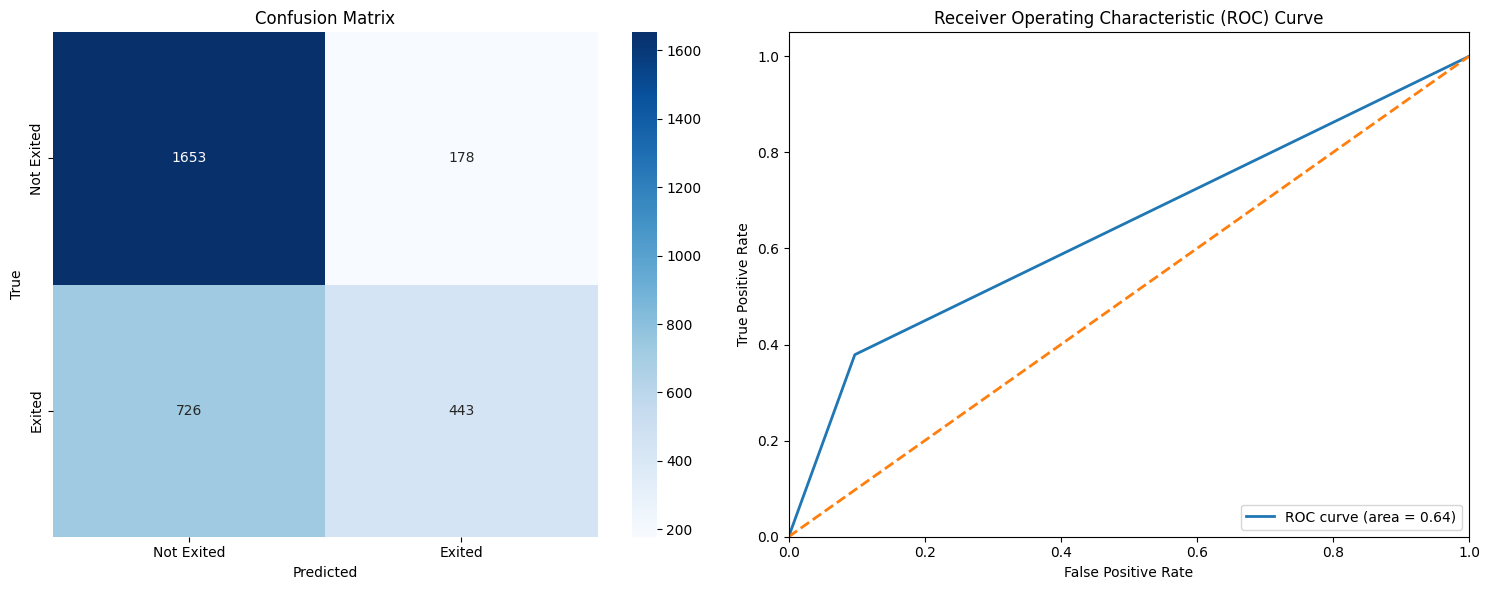

SVC with reduced Undersampling:
Accuracy: 0.7073333333333334
Precision: 0.7262479871175523
Recall: 0.38912855910267474
F1 Score: 0.5067415730337078


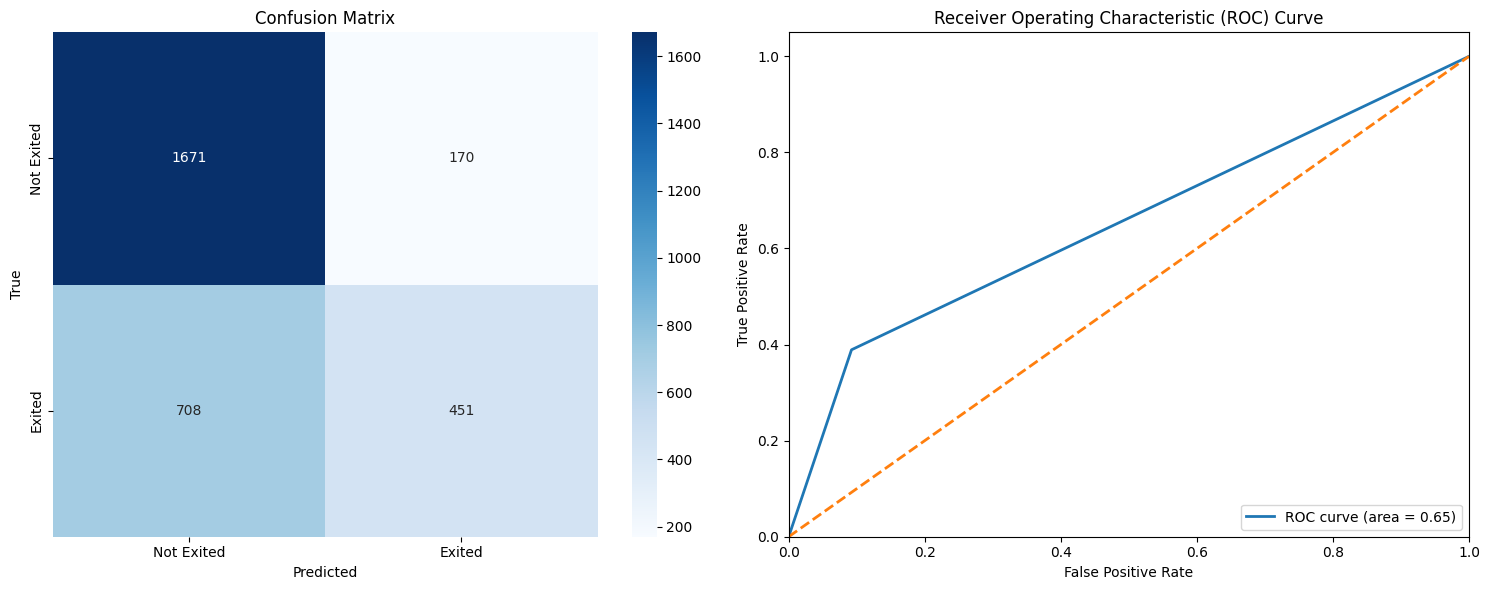

In [ ]:
# evaluating results for SVC undersampling
print("SVC with Undersampling:")
evaluate_classifier(testing_output, best_predictions_undersample_svc)

# evaluating results for SVC with reduced undersampling
print("SVC with reduced Undersampling:")
evaluate_classifier(testing_output_reduced, best_predictions_undersample_reduced_svc)

## Naives Bayes

Naives Bayes is a simple probabilistic classifier based on applying Bayes' theorem with a naive independence assumptions. Despite it, it performs surprinsingly well for Machine Learning Classification.

Altougth it doesn't make sense to parameterize it, we tried it with SMOTE and undersampling as well.

In [ ]:
from sklearn.naive_bayes import GaussianNB

# create an instance of the Naive Bayes classifier
nb_clf = GaussianNB()

# train the classifier with the training data
nb_clf.fit(training_input, training_output)

# make predictions on the testing data
nb_predictions = nb_clf.predict(testing_input)

# train the classifier Naive Bayes with SMOTE
nb_clf.fit(smote_resampled_training_input, smote_resampled_training_output)

# make predictions on Naive Bayes with SMOTE
nb_predictions_smote = nb_clf.predict(testing_input)

# fit Naive Bayes with reduced SMOTE
nb_clf.fit(smote_resampled_training_input_reduced, smote_resampled_training_output_reduced)

# make predictions on  Naive Bayes with reduced SMOTE
nb_predictions_smote_reduced = nb_clf.predict(testing_input_reduced)

# fit the classifier to Naive Bayes with undersampling
nb_clf.fit(undersampled_training_input, undersampled_training_output)

# make predictions on Naive Bayes with undersampling
nb_predictions_undersample = nb_clf.predict(testing_input)

# fit Naive Bayes with reduced undersampling
nb_clf.fit(undersampled_training_input_reduced, undersampled_training_output_reduced)

# make predictions onNaive Bayes with reduced undersampling
nb_predictions_undersample_reduced = nb_clf.predict(testing_input_reduced)




Naive Bayes without Sampling Techniques:
Accuracy: 0.78
Precision: 0.09017713365539452
Recall: 0.3708609271523179
F1 Score: 0.14507772020725387


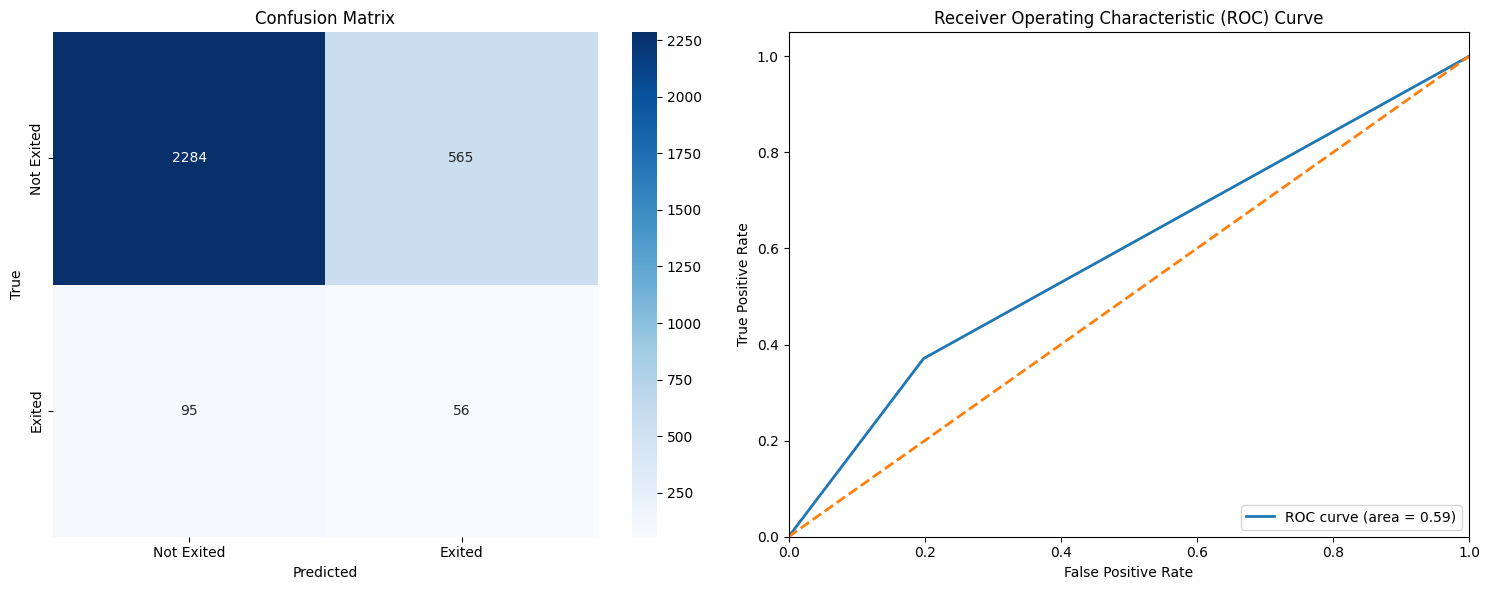

Naive Bayes with SMOTE:
Accuracy: 0.668
Precision: 0.7310789049919485
Recall: 0.35385814497272017
F1 Score: 0.47689075630252103


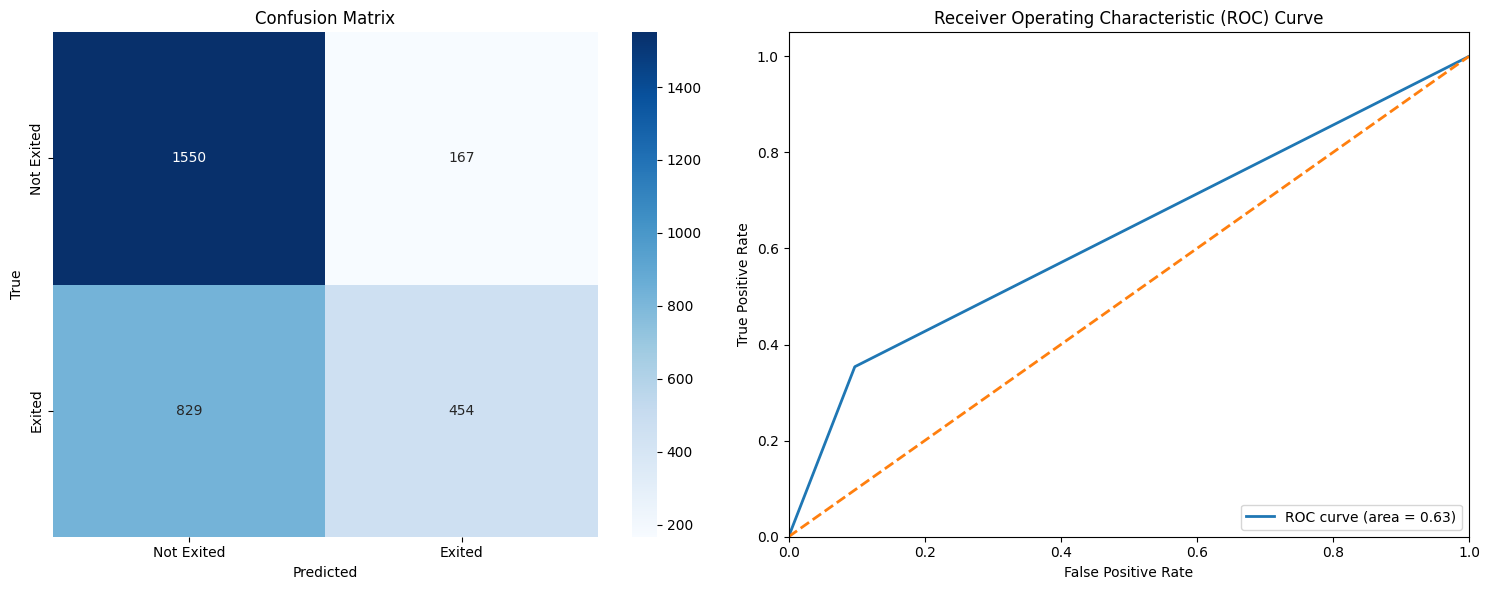

Naive Bayes with reduced SMOTE:
Accuracy: 0.6706666666666666
Precision: 0.750402576489533
Recall: 0.35873749037721325
F1 Score: 0.48541666666666666


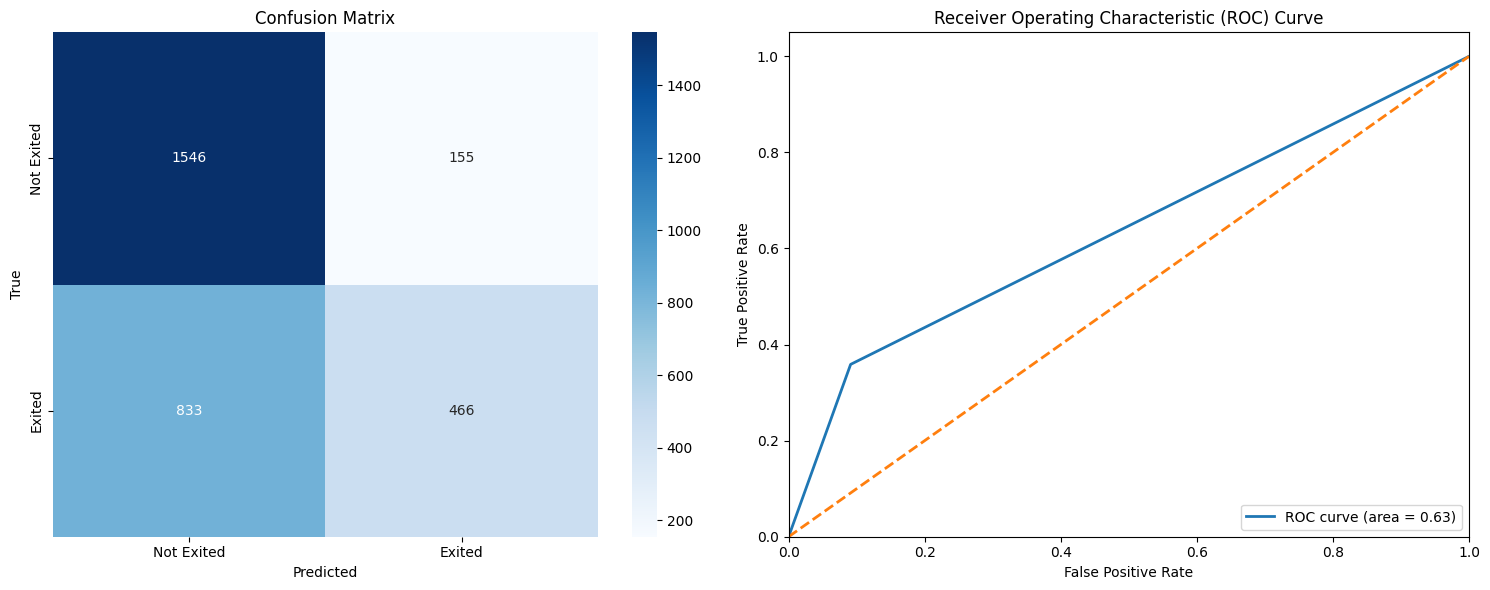

Naive Bayes with Undersampling:
Accuracy: 0.6873333333333334
Precision: 0.711755233494364
Recall: 0.3680266444629475
F1 Score: 0.48518111964873767


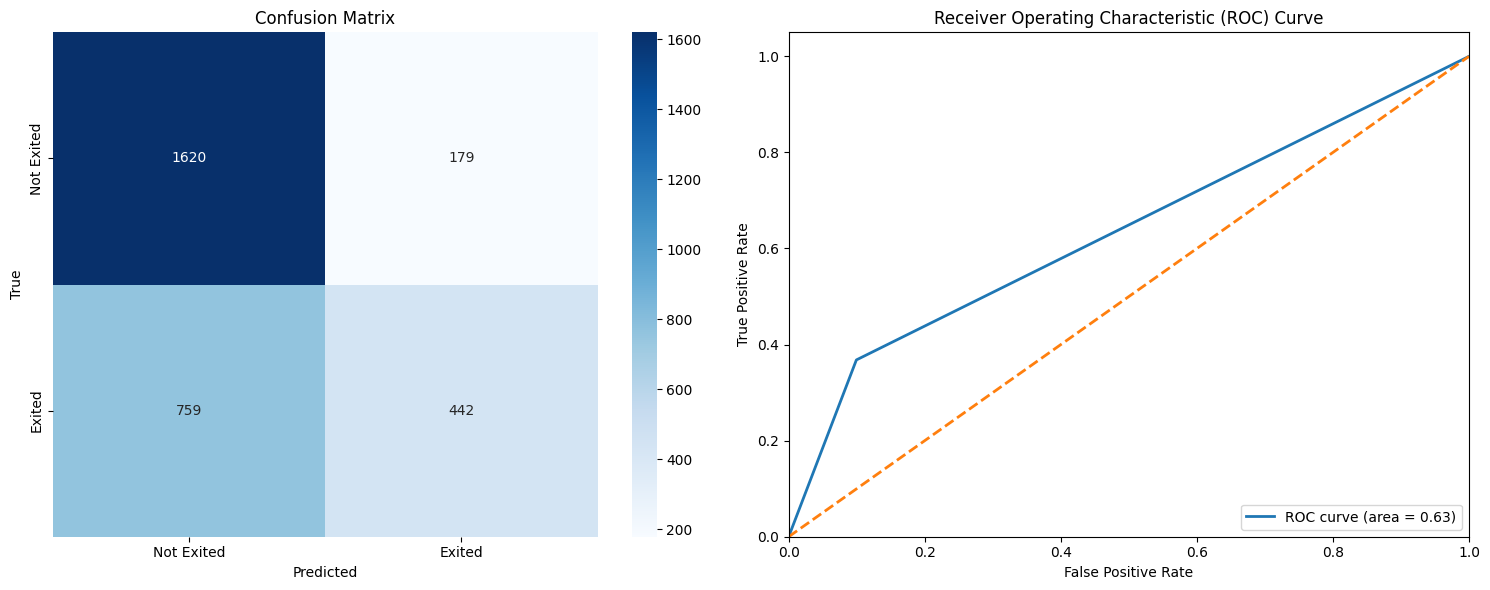

Naive Bayes with reduced Undersampling:
Accuracy: 0.6903333333333334
Precision: 0.7246376811594203
Recall: 0.37251655629139074
F1 Score: 0.4920721705850191


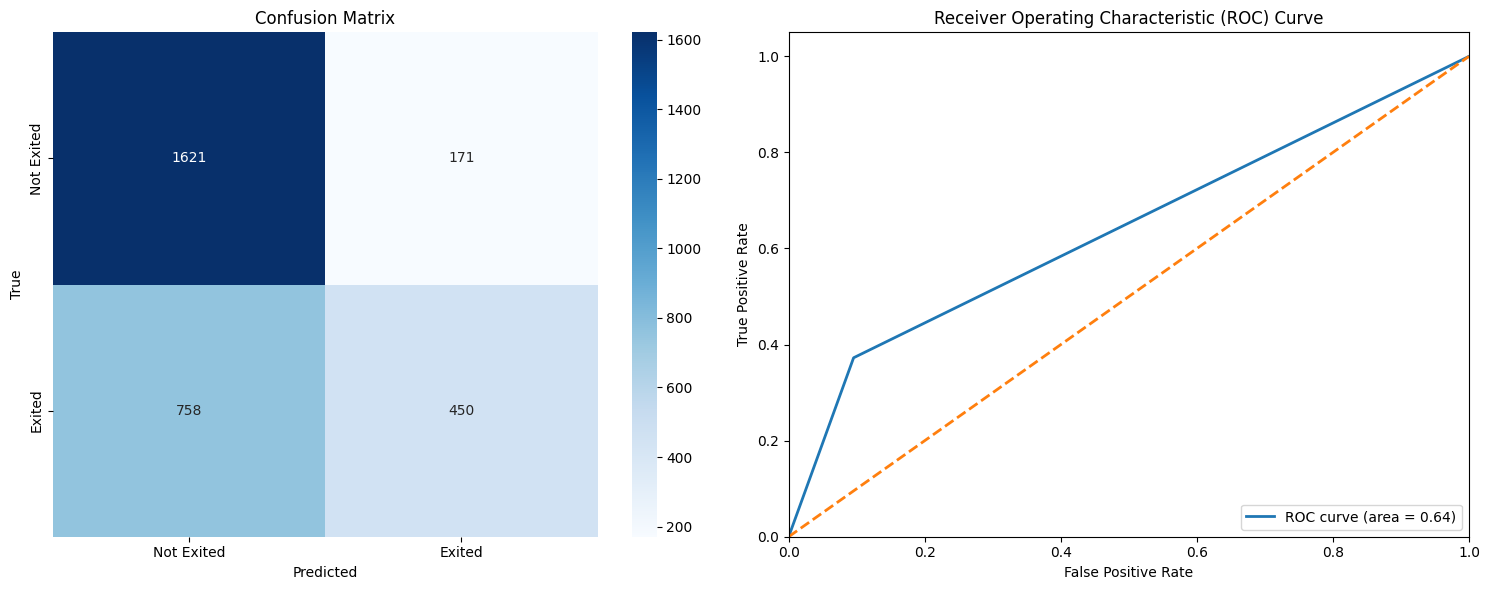

In [ ]:
# evaluating results for Naive Bayes without sampling techniques
print("Naive Bayes without Sampling Techniques:")
evaluate_classifier(testing_output, nb_predictions)

# evaluating results for Naive Bayes with SMOTE
print("Naive Bayes with SMOTE:")
evaluate_classifier(testing_output_reduced, nb_predictions_smote)


# evaluating results for Naive Bayes with reduced SMOTE
print("Naive Bayes with reduced SMOTE:")
evaluate_classifier(testing_output_reduced, nb_predictions_smote_reduced)


# evaluating results for Naive Bayes with undersampling
print("Naive Bayes with Undersampling:")
evaluate_classifier(testing_output_reduced, nb_predictions_undersample)

# evaluating results for Naive Bayes with reduced undersampling
print("Naive Bayes with reduced Undersampling:")
evaluate_classifier(testing_output_reduced, nb_predictions_undersample_reduced)

## Neural Network Classifier using MLPClassifier:

This classifier utilizes scikit-learn's MLPClassifier, which is a multi-layer classifier that implements a neural network with fully connected layers. It uses two different solvers, namely 'lbfgs' and 'adam', to optimize the weights of the neural network during training.

- **Features Experimented:**
  - **Hidden Layer Structure:** Two hidden layers with 100 and 50 neurons, and three hidden layers with 150, 100 and 50.
  - **Activation Function:** Rectified Linear Unit (ReLU) and Tanh.
  - **Alpha:** 0.001 and 0.05
  - **Learning Rate:** constant and adaptive
  - **Solver 1:** LBFGS (Limited-memory Broyden–Fletcher–Goldfarb–Shanno) solver.
  - **Solver 2:** Adam (Adaptive Moment Estimation) solver.


We decided to keep the Adam solver as the results were better.



Best parameters for Adam solver:  {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (150, 100, 50), 'learning_rate': 'constant'}
Best MLPClassifier Model with Adam Solver Evaluation:
Accuracy: 0.799
Precision: 0.5137195121951219
Recall: 0.5426731078904992
F1 Score: 0.5277995301487862


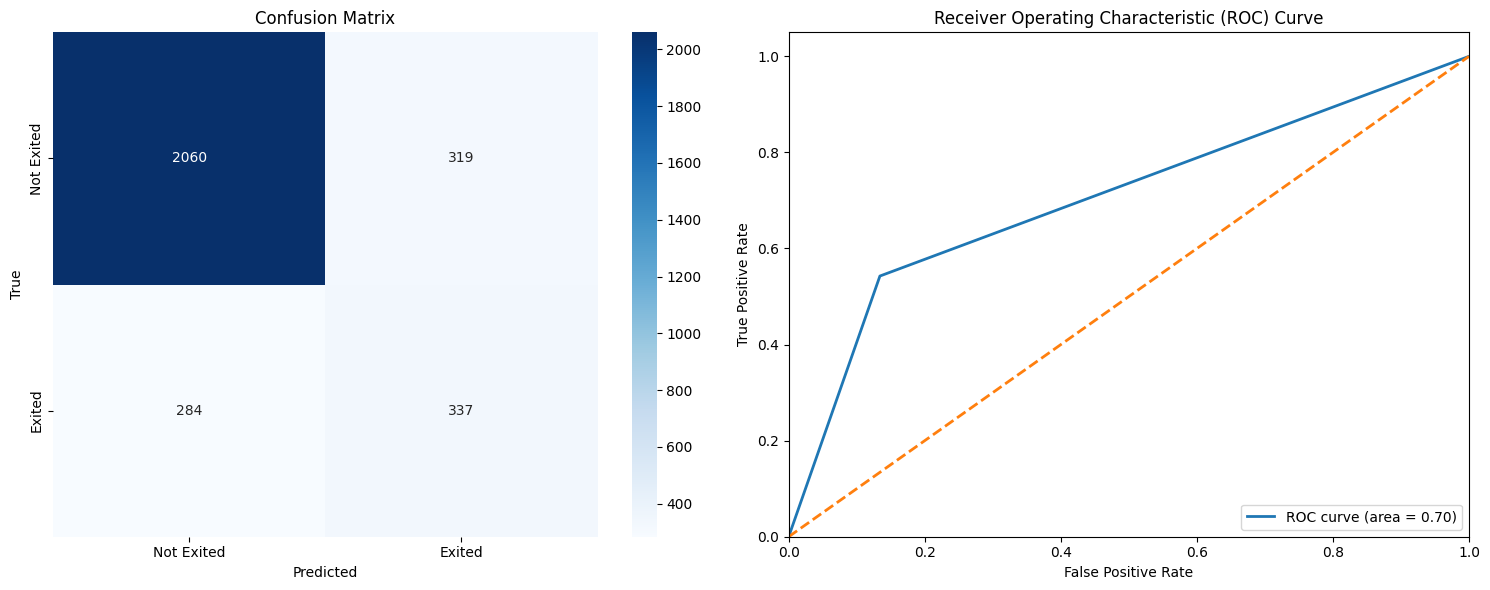

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# parameters for neural networks
param_grid_adam = {
    'hidden_layer_sizes': [ (100, 50), (150, 100, 50)],
    'activation': ['tanh', 'relu'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'adaptive'],
}

# scaling parameters
scaler = StandardScaler()
training_input_scaled = scaler.fit_transform(training_input)
testing_input_scaled = scaler.transform(testing_input)

# perform grid search
mlp_adam = MLPClassifier(solver='adam', max_iter=5000) 
grid_search_adam = GridSearchCV(estimator=mlp_adam, param_grid=param_grid_adam, n_jobs=-1, cv=5, scoring='accuracy')
grid_search_adam.fit(training_input_scaled, training_output)

# best parameters
best_params_adam = grid_search_adam.best_params_
best_mlp_adam = grid_search_adam.best_estimator_

print("Best parameters for Adam solver: ", best_params_adam)

# evaluation of results
best_mlp_adam.fit(training_input_scaled, training_output)
predictions_adam = best_mlp_adam.predict(testing_input_scaled)

print("Best MLPClassifier Model with Adam Solver Evaluation:")
evaluate_classifier(predictions_adam, testing_output)

## Evaluation of Classifiers

Lastly, we will be comparing the different metrics yielded by each of the Classifiers to understand which one is the most appropriate and efficient for the problem in question.

### Comparison of Metrics 

We decided to plot a graph that allows us to visually understand how different classifiers perform for the metrics chosen. We took into account all the version made for each of the classifiers.

Model  Accuracy  Precision    Recall  F1 Score
0                          DT  0.828667   0.502415  0.603482  0.548330
1                 DT w/ SMOTE  0.744333   0.684380  0.426707  0.525665
2             DT w/ SMOTE red  0.780000   0.692432  0.478309  0.565789
3        DTr w/ undersampling  0.721000   0.756844  0.406574  0.528981
4    DT w/ undersampling red.  0.743667   0.732689  0.430057  0.541989
5                         KNN  0.768333   0.061192  0.253333  0.098573
6                KNN w/ SMOTE  0.586667   0.368760  0.212628  0.269729
7           KNN w/ SMOTE red.  0.590333   0.375201  0.216946  0.274926
8        KNN w/ undersampling  0.517667   0.507246  0.216346  0.303322
9   KNN w/ undersampling red.  0.516333   0.510467  0.216530  0.304077
10                        SVC  0.798333   0.114332  0.563492  0.190094
11               SVC w/ SMOTE  0.728667   0.615137  0.399164  0.484157
12          SVC w/ SMOTE red.  0.732667   0.634461  0.406605  0.495597
13       SVC w/ undersampling  0.698667   0.713366  0.378956  0.494972
14  SVC w/ undersampling red.  0.707333   0.726248  0.389129  0.506742
15                         NB  0.780000   0.090177  0.370861  0.145078
16                NB w/ SMOTE  0.668000   0.731079  0.353858  0.476891
17        NB w/ SMOTE reduced  0.670667   0.750403  0.358737  0.485417
18        NB w/ undersampling  0.687333   0.711755  0.368027  0.485181
19   NB w/ undersampling red.  0.690333   0.724638  0.372517  0.492072
20            Neural Networks  0.799000   0.513720  0.542673  0.527800

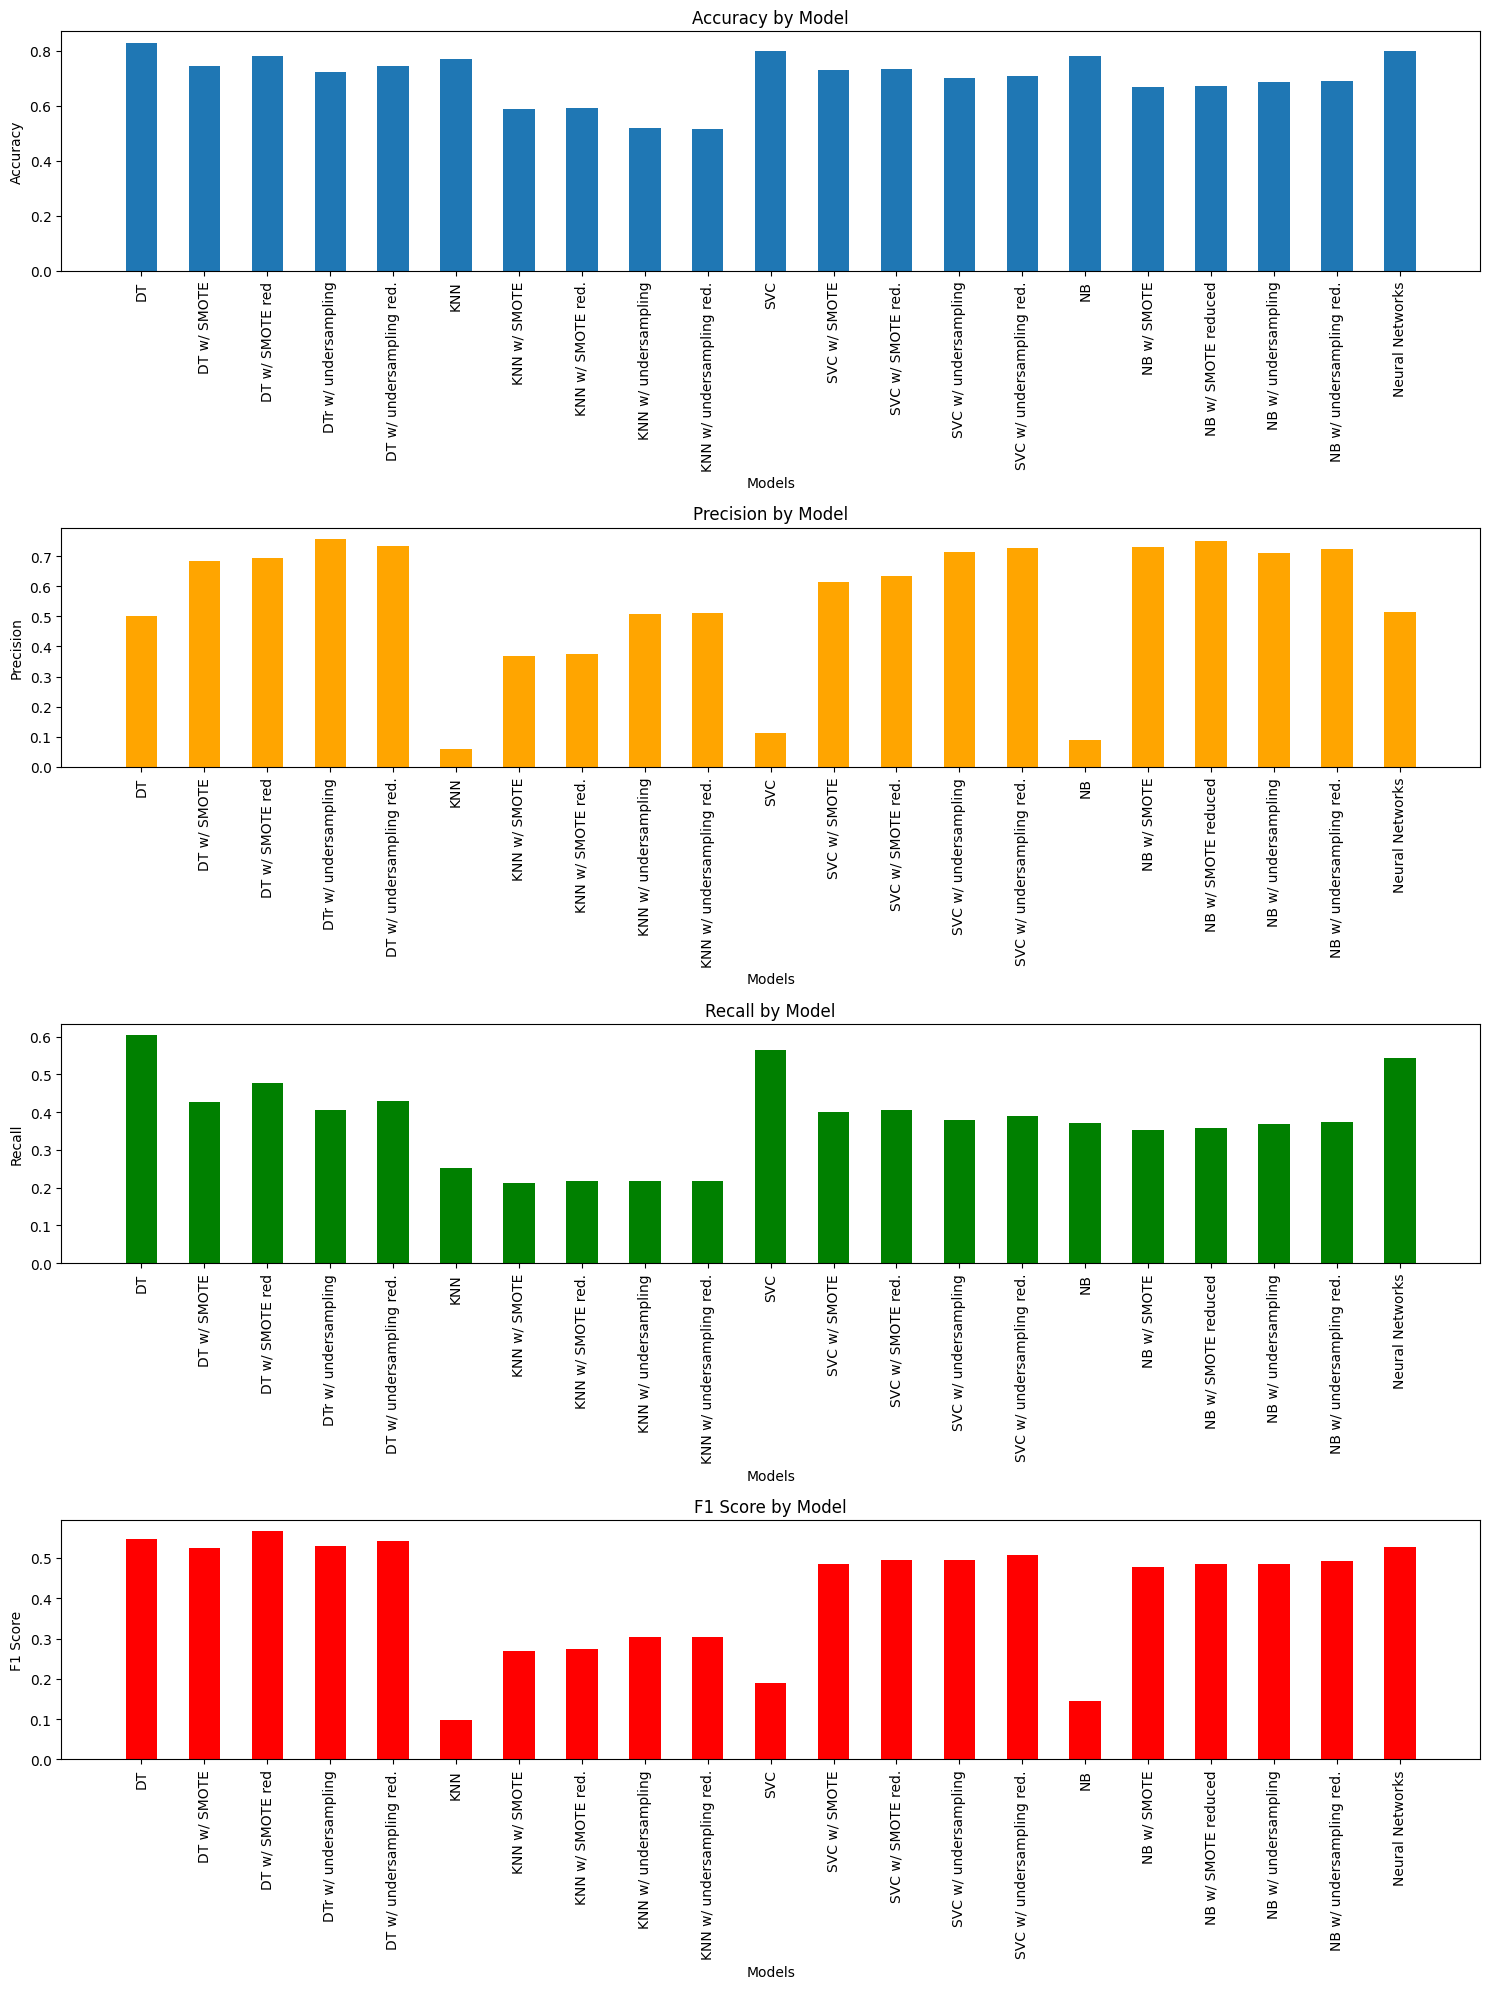

In [ ]:
import matplotlib.pyplot as plt


# labels for the x-axis
labels = ['DT', 'DT w/ SMOTE', 'DT w/ SMOTE red', 'DTr w/ undersampling', 'DT w/ undersampling red.', 'KNN', 'KNN w/ SMOTE', 'KNN w/ SMOTE red.', 'KNN w/ undersampling', 'KNN w/ undersampling red.','SVC', 'SVC w/ SMOTE', 'SVC w/ SMOTE red.', 'SVC w/ undersampling', 'SVC w/ undersampling red.', 'NB', 'NB w/ SMOTE', 'NB w/ SMOTE reduced', 'NB w/ undersampling', 'NB w/ undersampling red.', 'Neural Networks']
num_models = len(labels)

df = pd.DataFrame({
    'Model': labels,
    'Accuracy': accuracy_values,
    'Precision': precision_values,
    'Recall': recall_values,
    'F1 Score': f1_score_values
})

try:
    from IPython.display import display
    display(df)
except ImportError:
    pass


# parameters for bars
bar_width = 0.5
index = range(num_models)

# create the subplots
fig, ax = plt.subplots(4, 1, figsize=(15, 20))

# accuracy bar plot
ax[0].bar(index, accuracy_values, bar_width, label='Accuracy')
ax[0].set_xlabel('Models')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Accuracy by Model')
ax[0].set_xticks(index)
ax[0].set_xticklabels(labels, rotation=90)

# precision bar plot
ax[1].bar(index, precision_values, bar_width, label='Precision', color='orange')
ax[1].set_xlabel('Models')
ax[1].set_ylabel('Precision')
ax[1].set_title('Precision by Model')
ax[1].set_xticks(index)
ax[1].set_xticklabels(labels, rotation=90)

# recall bar plot
ax[2].bar(index, recall_values, bar_width, label='Recall', color='green')
ax[2].set_xlabel('Models')
ax[2].set_ylabel('Recall')
ax[2].set_title('Recall by Model')
ax[2].set_xticks(index)
ax[2].set_xticklabels(labels, rotation=90)

# f1 Score bar plot
ax[3].bar(index, f1_score_values, bar_width, label='F1 Score', color='red')
ax[3].set_xlabel('Models')
ax[3].set_ylabel('F1 Score')
ax[3].set_title('F1 Score by Model')
ax[3].set_xticks(index)
ax[3].set_xticklabels(labels, rotation=90)

# plot
plt.tight_layout()
plt.show()


The plotted graph indicates that accuracy tends to be higher for classifiers that do not employ any sampling techniques.

For the other two metrics, Precision, F1 score and recall, they are generally higher with sampling techniques, although there is no clear correlation between the specific type of sampling technique used and the performance achieved.


Overall, the Decision Tree Classifier without any sampling techniques performed the best across all metrics, with the exception of precision. Precision was highest for the reduced undersampling method, as previously mentioned.



### Comparison of Times 

Although Neural Networks had metric values close to Decision Trees, both their training and testing time were significantly bigger. With this in mind, we belive it is more valuable to use Decision Tree, since we are able to get the same quality of prediction for a quarter of the time.

### Evaluating Feature Importance

Calculating feature importance is crucial in classification machine learning tasks as it helps identify which features most significantly impact the model's predictions. 
We used Decision Trees for this evaluation because they provide a measure of feature importance, making them suitable for identifying the most influential features among the classifiers we used.

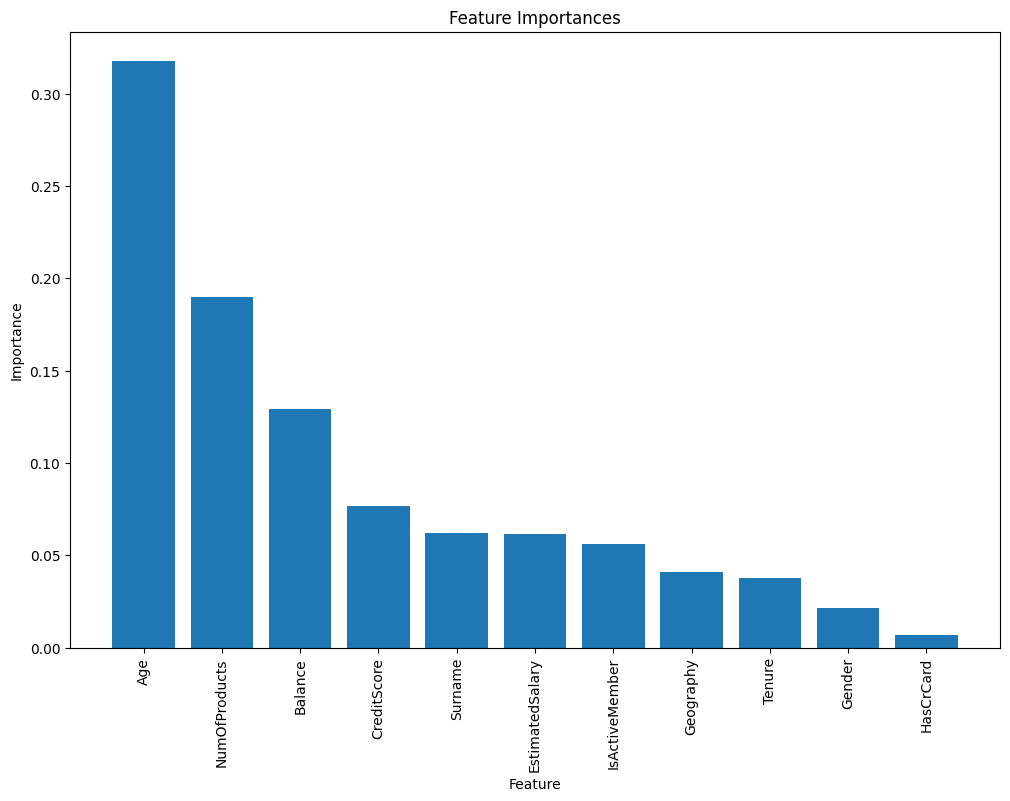

In [ ]:
# get feature importances
feature_importances = best_clf.feature_importances_

# sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# feature names
feature_names = training_input.columns

# plot feature importances
plt.figure(figsize=(12, 8))
plt.title('Feature Importances')
plt.bar(range(training_input.shape[1]), feature_importances[indices], align='center')
plt.xticks(range(training_input.shape[1]), feature_names[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()



As we had already predicted, age is the only feature that significantly influences the risk of churning. We recommend banks to particularly take this factor into account when developing strategies to mitigate customer churn.

### Comparison with Baselines

To validate our implementation of the classifiers, we compared the results obtained with a previously existing solution on Kaggle for the same dataset.

Among all the solutions we reviewed, the one with the best performance achieved an 87% accuracy using a Gradient Boosting Classifier, compared to our best solution, which achieved an 84% accuracy with a Decision Tree Classifier. The Kaggle solution consistently obtained slightly higher results across most of the same algorithms that we implemented.

We attribute this discrepancy primarily to the scaling of the data in the data preprocessing phase, which we did not perform. This difference in preprocessing appears to be the most significant factor affecting the performance outcomes between their implementation and ours.


## Conclusions and Recommendations

The conclusions taken after the development and evaluation of the models were the follwing:
- The Decision Tree Classifier without any sampling techniques performed the best across all metrics except precision, where the reduced version outperformed it.
- Applying sampling techniques generally improved all metrics except accuracy. However, reducing the dataset did not lead to significant improvements.
- For this particular problem, recall and precision are the most critical metrics. We recommend using models that optimize these two metrics.
- Age is the most significant attribute influencing the risk of churning. Future models should prioritize age as a key factor when predicting churn.
- Performing data scaling before implementing classifiers can potentially improve their performance. This step is recommended for future models.



## Reference
- Lecture slides
- https://seaborn.pydata.org
- https://www.geeksforgeeks.org/decision-tree-introduction-example/
- https://scikit-learn.org/stable/modules/neural_networks_supervised.html
- Solutions in Kaggle for comparison:
    - https://www.kaggle.com/code/chandansingh98/customer-churn-prediction-87-accuracy/notebook